<img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY" style="display:block; margin:auto; border:0px solid red;" width=50% height='250'/>

<p style="background-color:romance; color:plum; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bold; font-size:220%; line-height:1.4; text-transform: uppercase;">WAY TO REINVENT YOURSELF</p>


<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:bolder; font-size:3em; line-height:1.4; text-transform:capitalize;"><strong>US Army Anthropometric Working Databases (ANSUR II)</strong></p>

<p style="background-color:romance; color:jaguar; text-align:center; border-radius:10px 10px; font-family:newtimeroman; font-weight:normal; font-size:2em; line-height:1.4; text-transform:capitalize;">Multi-Class Classification problems with EDA</p> 

<basefont size="2" face ="arial, verdana, sans-serif" color="jaguar">

**WELCOME!**

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

**Determines**

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

<a id="0">**TASKS**</a>

01. Exploratory Data Analysis (EDA)
    - Import Libraries, Load Dataset, Exploring Data
      1. *i. Import Libraries*
      2. *ii. Ingest Data*
      3. *iii. Explore Data*
      4. *iv. Outlier Detection*
      5. *v.  Drop unnecessary features*
02. Data Preprocessing
    + Scale (if needed)
    + Separete the data frame for evaluation purposes
03. Multi-class Classification
    * Import libraries
    * Implement SVM Classifer
    * Implement Decision Tree Classifier
    * Implement Random Forest Classifer
    * Implement XGBoost Classifer
    * Compare The Models

<a id="1"></a>

# EDA

<!-- <a href="#0" class="btn btn-primary btn-sm" role="button" aria-pressed="true" data-toggle="popover" style="background-color:DarkOrange; color:White;">**Tasks**</a> -->

- Drop unnecessary colums
- Drop **DODRace** class if **`value count below 500`** (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install skimpy
from skimpy import clean_columns
import scipy.stats as stats
from scipy.stats import skew, kurtosis

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Environment settings: 
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
# pd.set_option('display.float_format', lambda x: '%.6f'%x)
# pd.options.display.float_format = '{:.3f}'.format
# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

In [2]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

In [3]:
random_state=42

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [4]:
df_female_origin = pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')
df_female = df_female_origin.copy()
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [5]:
df_male_origin = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr', encoding='unicode_escape')
df_male = df_male_origin.copy()
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [6]:
df_female.shape, df_male.shape

((1986, 108), (4082, 108))

In [7]:
df_female.info(), df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, SubjectId to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB


(None, None)

In [8]:
df_male.info(max_cols=110)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 108 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    subjectid                       4082 non-null   int64 
 1    abdominalextensiondepthsitting  4082 non-null   int64 
 2    acromialheight                  4082 non-null   int64 
 3    acromionradialelength           4082 non-null   int64 
 4    anklecircumference              4082 non-null   int64 
 5    axillaheight                    4082 non-null   int64 
 6    balloffootcircumference         4082 non-null   int64 
 7    balloffootlength                4082 non-null   int64 
 8    biacromialbreadth               4082 non-null   int64 
 9    bicepscircumferenceflexed       4082 non-null   int64 
 10   bicristalbreadth                4082 non-null   int64 
 11   bideltoidbreadth                4082 non-null   int64 
 12   bimalleolarbreadth              

In [9]:
# with iloc column over 100
# df_female.iloc[:, :100].info(), df_female.iloc[:, 100:].info()

In [10]:
# df_female.info(verbose=True)

## Explore Data

### If needed, rename the columns' names for easy use. 

In [11]:
(df_female.columns!=df_male.columns).sum()

1

In [12]:
# df_female.columns==df_male.columns
df_female.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [13]:
df = pd.concat([df_female,df_male], ignore_index=True)

In [14]:
df.shape

(6068, 108)

In [15]:
# clean_columns(df)

### Check if there are some dublicate rows or not. If there are, then drop them.

In [16]:
df.duplicated().sum()

0

### Basically check the missing values. (NaN, None)-(isna(), mean())

In [17]:
(df.isna().mean()*100).tail(10)

Branch                   0.0000
PrimaryMOS               0.0000
SubjectsBirthLocation    0.0000
SubjectNumericRace       0.0000
Ethnicity               76.5821
DODRace                  0.0000
Age                      0.0000
Heightin                 0.0000
Weightlbs                0.0000
WritingPreference        0.0000
dtype: float64

### Check the statistical values of features.

In [18]:
df.describe(include='number')

subjectid  abdominalextensiondepthsitting  acromialheight  \
count   6068.0000                       6068.0000       6068.0000   
mean   20757.1984                        246.4687       1406.1613   
std    13159.3909                         37.4001         79.0910   
min    10027.0000                        155.0000       1115.0000   
25%    14841.7500                        219.0000       1350.0000   
50%    20063.5000                        242.0000       1410.0000   
75%    27234.5000                        271.0000       1462.0000   
max   920103.0000                        451.0000       1683.0000   

       acromionradialelength  anklecircumference  axillaheight  \
count              6068.0000           6068.0000     6068.0000   
mean                327.3744            224.8914     1299.6088   
std                  20.7200             16.0518       72.0223   
min                 249.0000            156.0000     1038.0000   
25%                 313.0000            214.0000     1249.0000   
50%                 328.0000            225.0000     1302.0000   
75%                 341.2500            235.0000     1349.0000   
max                 393.0000            293.0000     1553.0000   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                6068.0000         6068.0000          6068.0000   
mean                  244.1926          194.7546           399.2042   
std                    16.8450           13.5164            30.2369   
min                   186.0000          151.0000           283.0000   
25%                   232.0000          185.0000           376.0000   
50%                   245.0000          195.0000           404.0000   
75%                   256.0000          204.0000           421.0000   
max                   306.0000          245.0000           489.0000   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                  6068.0000         6068.0000         6068.0000   
mean                    340.9342          274.7350          490.7544   
std                      41.5199           19.2210           42.1355   
min                     216.0000          197.0000          357.0000   
25%                     311.0000          262.0000          460.0000   
50%                     341.0000          274.0000          492.0000   
75%                     370.0000          288.0000          520.0000   
max                     490.0000          362.0000          637.0000   

       bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
count           6068.0000         6068.0000                  6068.0000   
mean              72.2526          324.8965                   306.6361   
std                5.3446           17.0875                    20.7942   
min               55.0000          267.0000                   245.0000   
25%               68.0000          314.0000                   292.0000   
50%               72.0000          326.0000                   307.0000   
75%               76.0000          336.0000                   321.0000   
max               91.0000          385.0000                   390.0000   

       bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
count           6068.0000             6068.0000     6068.0000      6068.0000   
mean             139.7235             1020.0847      241.6200       870.1523   
std                7.3085               76.4226       26.4830        54.8226   
min              116.0000              737.0000      168.0000       656.0000   
25%              135.0000              968.0000      222.0000       832.0000   
50%              140.0000             1017.0000      241.0000       868.0000   
75%              145.0000             1068.0000      259.0000       906.2500   
max              174.0000             1341.0000      349.0000      1080.0000   

       buttockkneelength  buttockpopliteallength  calfcircumference  \
count          6068.0000               6068

In [19]:
df.describe().T[df.describe().T['std']>df.describe().T['mean']]

count    mean      std    min    25%    50%    75%  \
SubjectNumericRace 6068.0000 17.5153 550.9499 1.0000 1.0000 1.0000 2.0000   

                          max  
SubjectNumericRace 42351.0000

- subjectid, SubjectNumericRace

In [20]:
df.describe(include='O').T

count unique                     top  freq
Gender                 6068      2                    Male  4082
Date                   6068    253               27-Feb-12    45
Installation           6068     12             Camp Shelby  1160
Component              6068      3            Regular Army  3140
Branch                 6068      3  Combat Service Support  3174
PrimaryMOS             6068    285                     11B   671
SubjectsBirthLocation  6068    152              California   446
Ethnicity              1421    209                 Mexican   357
WritingPreference      6068      3              Right hand  5350

In [21]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace
Army National Guard  1         0.6850
                     2         0.1843
                     3         0.0934
                     4         0.0222
                     5         0.0089
                     6         0.0063
Army Reserve         1         0.5182
                     2         0.2364
                     3         0.1864
                     4         0.0409
                     6         0.0136
                     5         0.0045
Regular Army         1         0.5806
                     2         0.2379
                     3         0.1226
                     4         0.0379
                     6         0.0124
                     5         0.0076
                     8         0.0010
Name: DODRace, dtype: float64

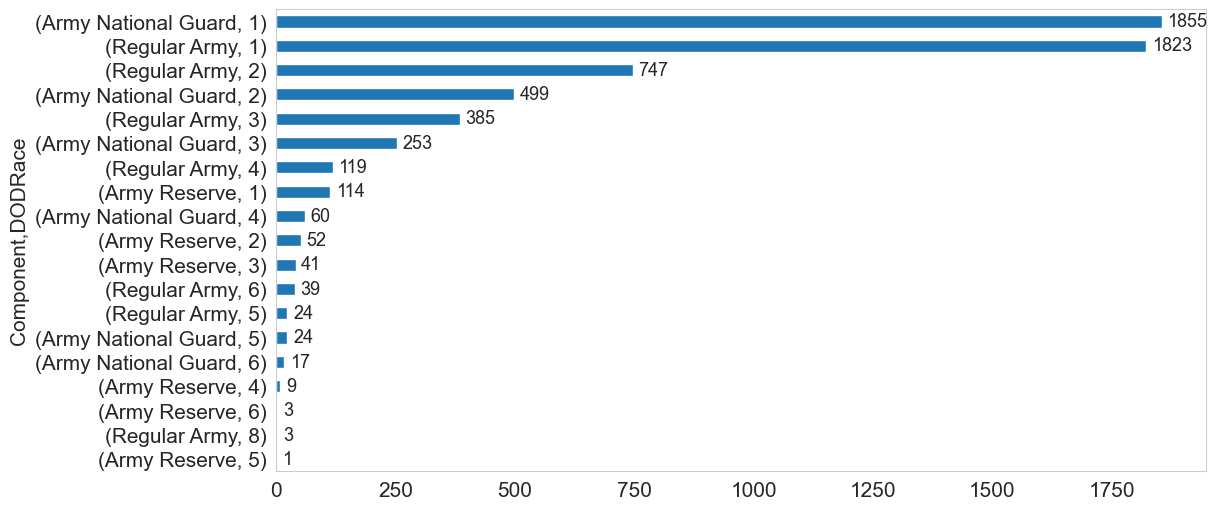

In [22]:
g = df.groupby(["Component"])["DODRace"].value_counts().sort_values().plot.barh()
g.bar_label(g.containers[0], padding=4, fontsize=13);

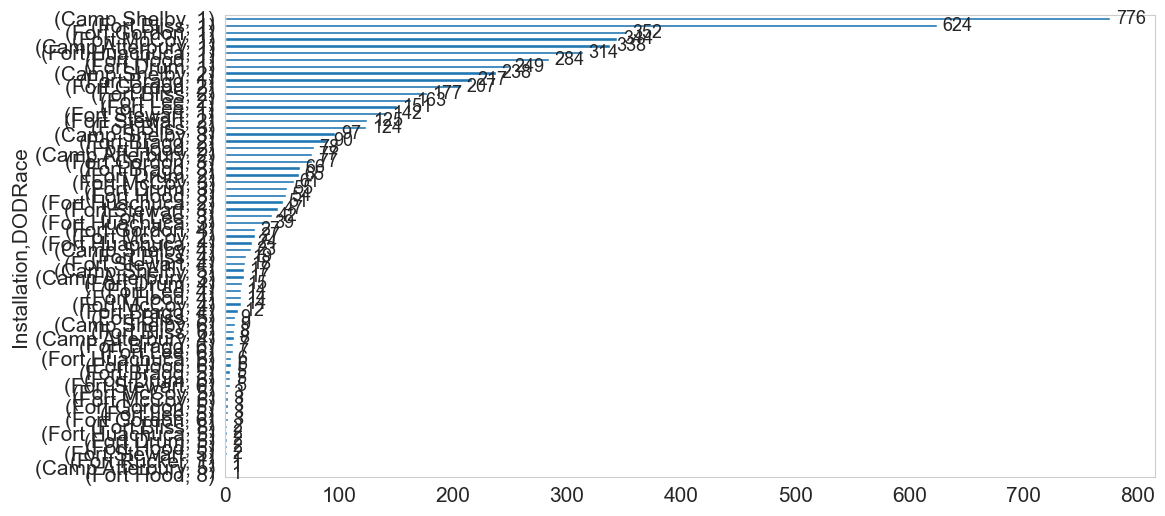

In [23]:
g = df.groupby(["Installation"])["DODRace"].value_counts().sort_values().plot.barh()
g.bar_label(g.containers[0], padding=4, fontsize=13);

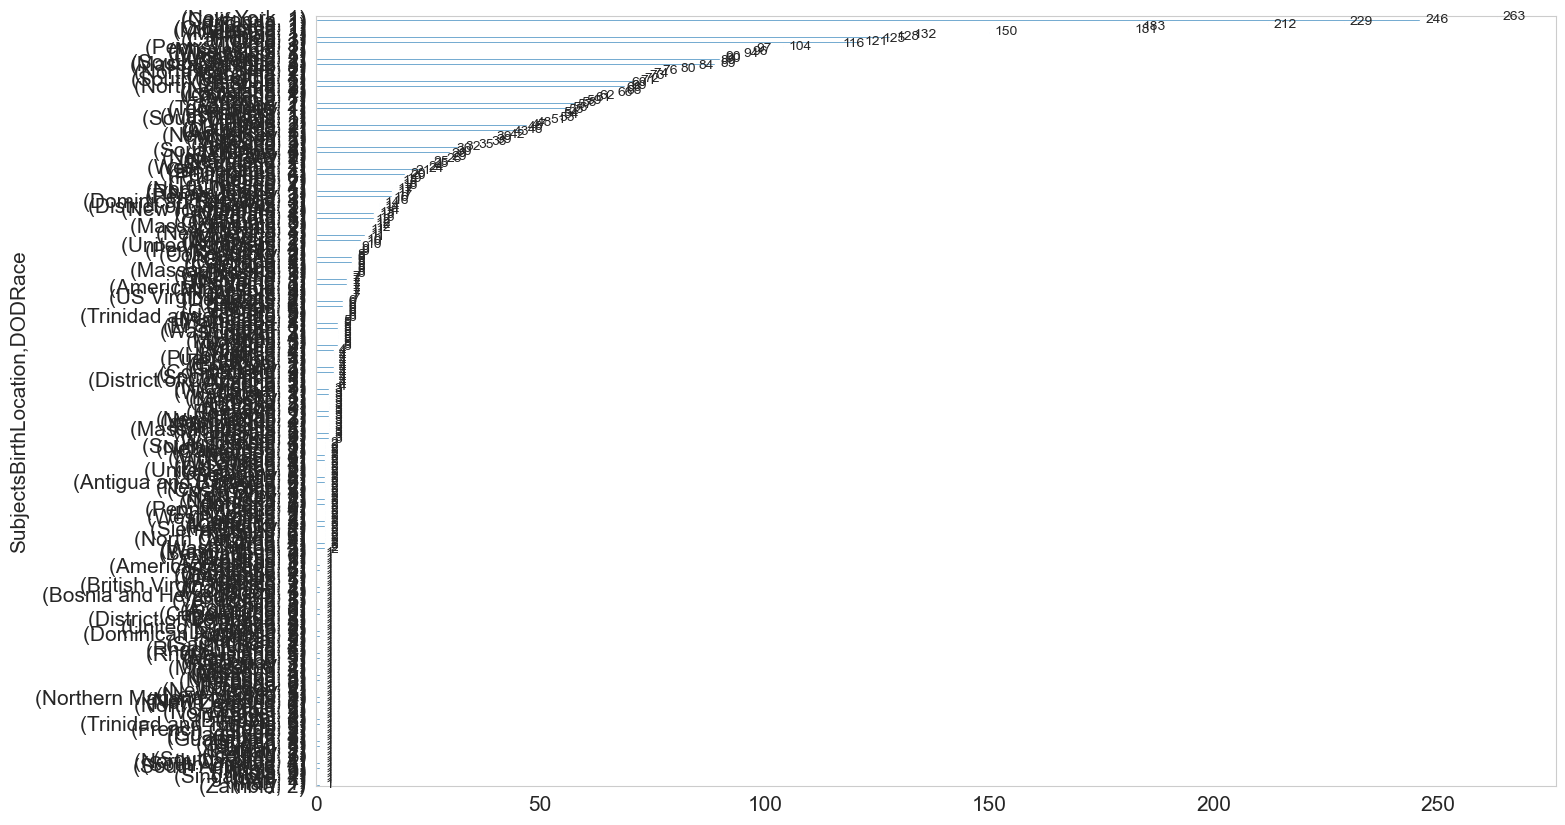

In [24]:
g = df.groupby(["SubjectsBirthLocation"])["DODRace"].value_counts().sort_values().plot.barh(figsize=(16,10))
g.bar_label(g.containers[0], padding=4, fontsize=10);

In [25]:
df[df['SubjectNumericRace']!=df['DODRace']].shape

(806, 108)

In [26]:
print(df.columns.to_list())

['subjectid', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference', 'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc', 'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength', 'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heel

In [27]:
# drop columns repeated and unnecessary column 
df.drop(columns=['subjectid', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectNumericRace',
    'Ethnicity', 'Heightin', 'Weightlbs'], inplace=True)

In [28]:
df["DODRace"].value_counts().sort_index()

1    3792
2    1298
3     679
4     188
5      49
6      59
8       3
Name: DODRace, dtype: int64

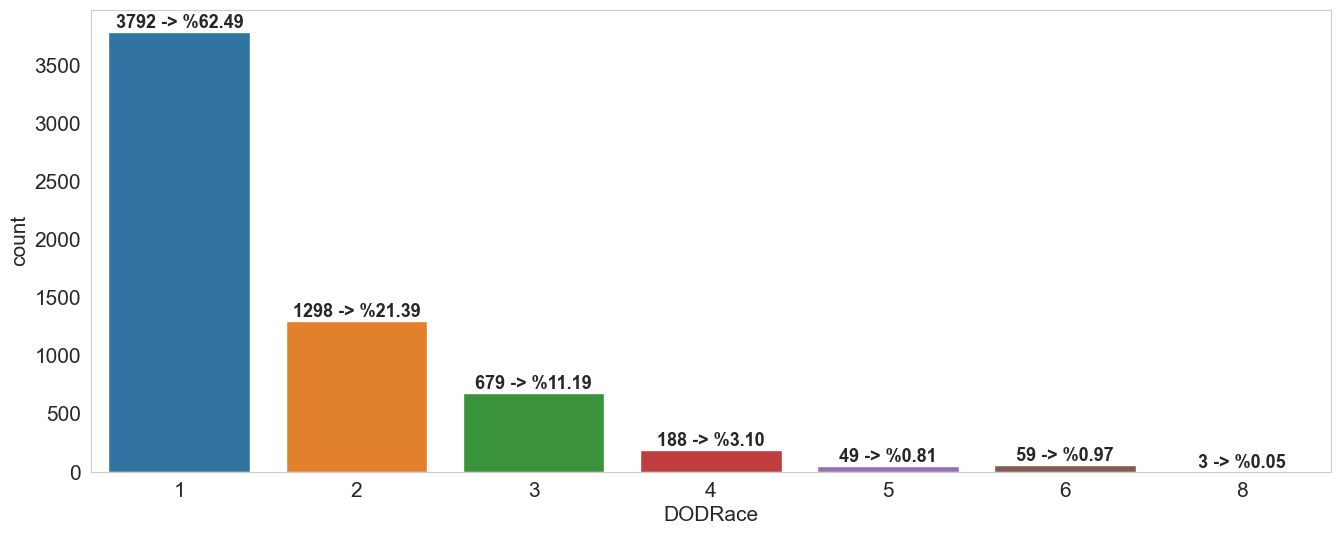

In [29]:
fig, ax = plt.subplots(figsize=(16,6))
# to show the proportion of each class
g = sns.countplot(df["DODRace"])
for c in g.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{h} -> %{100*(h/df["DODRace"].count()):0.2f}' if (h:=v.get_height()) > 0 else '' for v in c]
    g.bar_label(c, labels=labels, fontsize=13, weight='bold', rotation=0) 

In [30]:
df = df[df['DODRace'].isin([1,2,3])]
df['DODRace'].value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

<AxesSubplot:title={'center':'Percentage of Target'}>

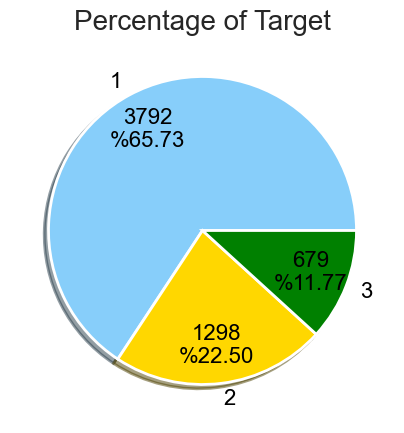

In [31]:
df['DODRace'].value_counts().sort_index().plot.pie(
#     subplots=True, layout=(1,2),
#     startangle=90, legend=True,
    shadow=True, figsize=(5,5),
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'w'},
    colors=['LightSkyBlue', 'gold', 'g', 'm'],
#     explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.1],
    title='Percentage of Target',
#     labels=['Kecimen', 'Besni'],
    ylabel= "",
    labeldistance=1.1, pctdistance=0.75, 
    autopct=lambda x: '{:.0f}\n%{:.2f}'.format(len(df['DODRace'])*x/100, x), 
#     lambda x: '{:.0f}\n{:.2f}%'.format(len(df['species'])*x/100, x) 
#     "%.1f%%"
#     lambda x: f'{(x/100*len(df['species'])):.0f}\n{x:.2f}%'
)#.legend(loc='best', bbox_to_anchor=(1.0, 0.5)); # Not subplots

In [32]:
df.groupby('Gender')['DODRace'].value_counts().sort_index().to_frame().unstack(0)

DODRace      
Gender   Female  Male
DODRace              
1           975  2817
2           656   642
3           239   440

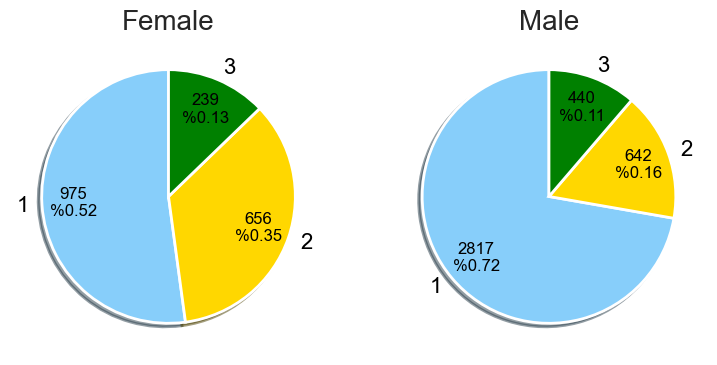

In [33]:
g = df.groupby('Gender')['DODRace'].value_counts(normalize=True).sort_index().to_frame().unstack(0).plot.pie(
    subplots=True, layout=(1,2), 
    startangle=90, legend=False,
    shadow=True, figsize=(9, 9),
    textprops={'fontsize':16, 'color':'k'},
    wedgeprops = {'linewidth':2, 'edgecolor':'w'},
    colors=['LightSkyBlue', 'gold', 'g'],
#     explode=[0, 0, 0, 0.1, 0.1, 0.1, 0.1],
    title=["Female","Male"],
    ylabel= "",
#     labels=['Kecimen', 'Besni'],
    labeldistance=1.1, pctdistance=0.75, 
    autopct=lambda x: '{:.0f}\n%{:.2f}'.format(len(df['DODRace'])*x/100, x), 
#     lambda x: '{:.0f}\n{:.2f}%'.format(len(df['species'])*x/100, x) 
#     "%.1f%%"
#     lambda x: f'{(x/100*len(df['species'])):.0f}\n{x:.2f}%'
)#.legend(loc='best', bbox_to_anchor=(1.0, 0.5)); # Not subplots

data = df.groupby('Gender')['DODRace'].value_counts().sort_index().to_frame().unstack(0)
data_per = df.groupby('Gender')['DODRace'].value_counts(normalize=True).sort_index().to_frame().unstack(0)
for x, ra in enumerate(g.ravel()):
    index = 1
    for y, te in enumerate(ra.texts):
        if y%2:
            te.set_text(f'{data.iloc[:, x][index].round(2)}\n%{data_per.iloc[:, x][index].round(2)}')
            te.set_fontsize(12)
            index+=1

## Outlier Detection

In [34]:
# We can produce a function to get the number of outliers respectively each class. For the sake of practicality, we find the outliers for features without consideration of class distinction
def detect_outliers(df, col_name, tukey=1.5):
    ''' 
    this function detects outliers based on 1.5 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    IQR = q3 - q1
                      
    upper_limit = q3 + (tukey*IQR)
    lower_limit = q1 - (tukey*IQR)
    outlier_count = ((df[col_name]<lower_limit) | (df[col_name]>upper_limit)).sum()
 
    return lower_limit, upper_limit, outlier_count

In [35]:
# iqr=3
def get_outliers_cols(df, columns, tukey=3):
    out_cols = []
    for col in columns:
        print(
            f"{detect_outliers(df, col, tukey)[2]:<3}: outlier -> {col}\
            \nlower:{detect_outliers(df, col, tukey)[0]:<10}, upper:{detect_outliers(df, col, tukey)[1]:<10}\n"
        )
        out_cols.append(col) if detect_outliers(df, col, tukey)[2] else _
            
    return out_cols 

In [36]:
# objects = df.select_dtypes('O').columns
numbers = df.select_dtypes('number').columns

numbers.shape

(95,)

In [37]:
out_cols = get_outliers_cols(df, numbers, tukey=3)

1  : outlier -> abdominalextensiondepthsitting            
lower:64.0      , upper:428.0     

0  : outlier -> acromialheight            
lower:1020.0    , upper:1797.0    

0  : outlier -> acromionradialelength            
lower:230.0     , upper:426.0     

0  : outlier -> anklecircumference            
lower:151.0     , upper:298.0     

0  : outlier -> axillaheight            
lower:955.0     , upper:1648.0    

0  : outlier -> balloffootcircumference            
lower:164.0     , upper:325.0     

0  : outlier -> balloffootlength            
lower:129.0     , upper:262.0     

0  : outlier -> biacromialbreadth            
lower:242.0     , upper:557.0     

0  : outlier -> bicepscircumferenceflexed            
lower:138.0     , upper:544.0     

0  : outlier -> bicristalbreadth            
lower:184.0     , upper:366.0     

0  : outlier -> bideltoidbreadth            
lower:284.0     , upper:697.0     

0  : outlier -> bimalleolarbreadth            
lower:44.0      , upper:100.0 

In [38]:
out_cols

['abdominalextensiondepthsitting',
 'chestdepth',
 'hipbreadth',
 'hipbreadthsitting',
 'lowerthighcircumference',
 'thighclearance',
 'waistdepth']

In [39]:
df1 = df.copy()

In [40]:
# # We have decided to drop outliers over 1,5 iqr
# for col in out_cols:
#     df = df[(df[col]>detect_outliers(df, col, tukey=1.5)[0]) & (df[col]<detect_outliers(df, col, tukey=1.5)[1])]
# df.shape

In [41]:
len(df1) - len(df)

0

In [42]:
df.groupby('Gender')['DODRace'].value_counts().sort_index().to_frame().unstack(0)

DODRace      
Gender   Female  Male
DODRace              
1           975  2817
2           656   642
3           239   440

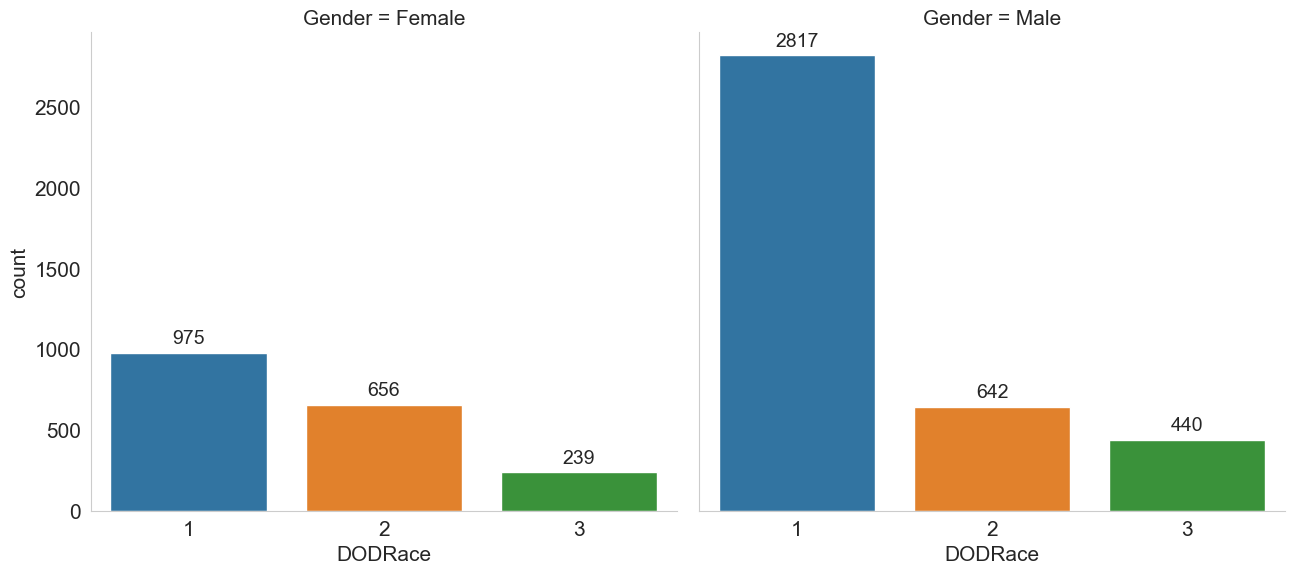

In [43]:
g = sns.catplot(
    x="DODRace", data=df,  hue=None,
    kind="count", col="Gender",   
    height=6, aspect=1.1,
);
for f in g.axes.flatten():
    for c in f.containers:
        f.bar_label(c, padding=4, fontsize=14);

### Numerical Columns

#### Hist plot All Numerical Columns

  #### Box plot All Numerical Columns

#### Regplot plot All Numerical Columns

### Categorical Columns

#### Countplot for Categorical Columns

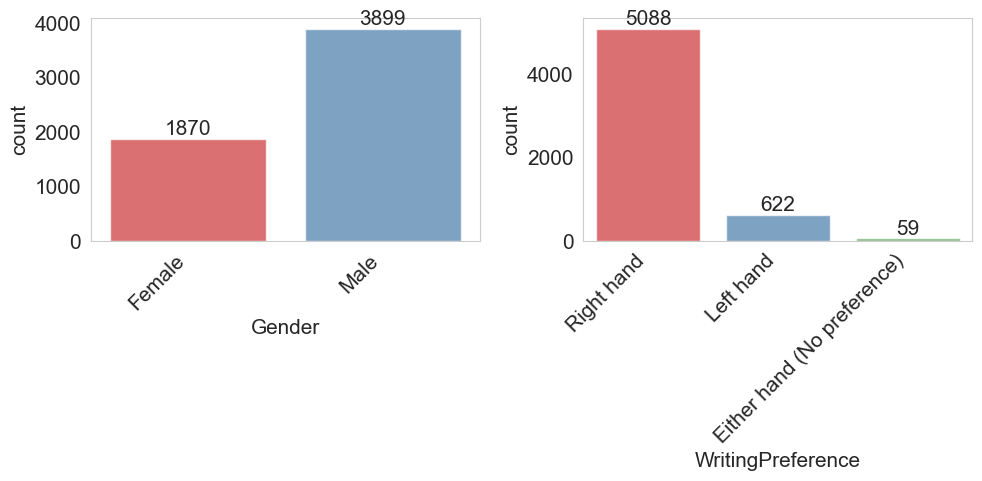

In [53]:
categorical_features = [i for i in df.select_dtypes('O').columns if df[i].nunique()<15]

fig = plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(int(np.ceil(len(categorical_features)/3)), 3, i+1)
    g = sns.countplot(x=df[col], alpha=0.7, data=df, palette="Set1")
    g.bar_label(g.containers[0])
#     g.tick_params(axis='x', rotation=45)
#     g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

#### Boxplots for Categorical Columns

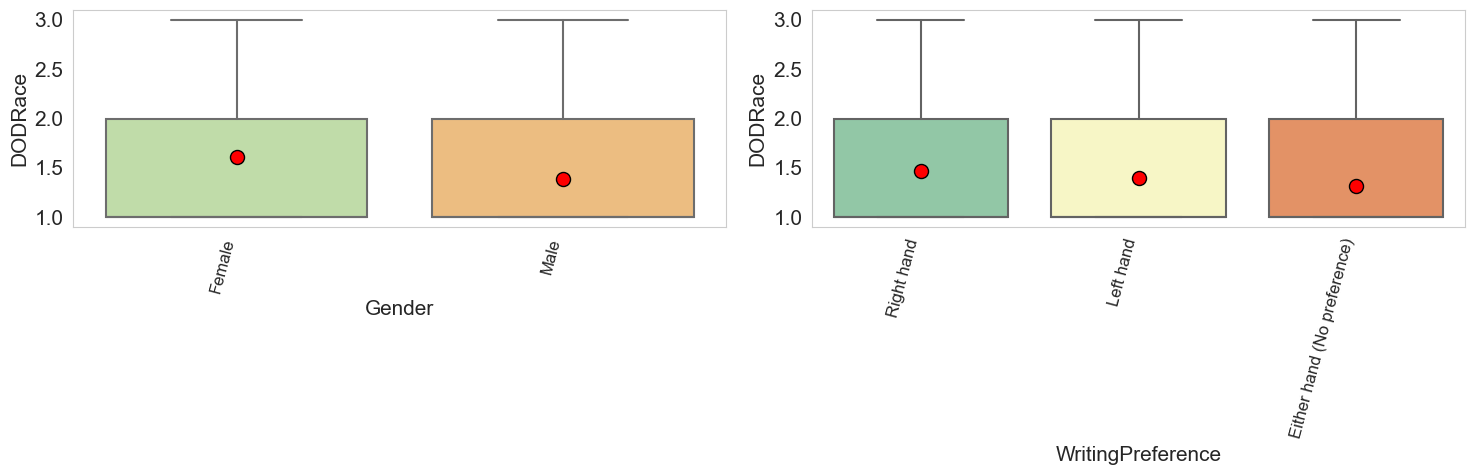

In [55]:
categorical_features = [i for i in df.select_dtypes('O').columns if df[i].nunique()<15]

fig = plt.figure(figsize=(15, 5))
for i, col in enumerate(categorical_features):
    plt.subplot(int(np.ceil(len(categorical_features)/2)), 2, i+1)
    g = sns.boxplot(x=df[col], y="DODRace", data=df, palette="Spectral_r")
#     g.tick_params(axis='x', rotation=45)
#     g.set_xticklabels(g.get_xticklabels(), rotation=45)
    plt.xticks(rotation=75, ha='right', fontsize=12)
    plt.tight_layout()

## Correlation between numbersal features

In [136]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [137]:
def check_multicolinarity(data, rate=0.9):
    ''' data = numbers list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= rate and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    df_corr
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

# check_multicolinarity(df)

In [138]:
# sns.heatmap(
#     df[numbers].corr().round(2), 
#     mask=np.triu(np.ones_like(df[numbers].corr(), dtype=bool)), 
#     annot=True, vmin=-1, vmax=1
# )

In [139]:
# dfCorr = df[numbers].corr()
# filteredDf = dfCorr[(abs(dfCorr) >=.6) & (abs(dfCorr)!=1)]
# sns.heatmap(
#     filteredDf, 
#     mask=np.triu(np.ones_like(df[numbers].corr(), dtype=bool)), 
#     annot=True, vmin=-1, vmax=1, cmap="PiYG"
# )

In [140]:
df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr').head(5)

Corr
abdominalextensiondepthsitting abdominalextensiondepthsitting 1.0000
cervicaleheight                stature                        0.9911
stature                        suprasternaleheight            0.9891
cervicaleheight                suprasternaleheight            0.9891
acromialheight                 axillaheight                   0.9871

In [141]:
df.info(max_cols=5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5769 entries, 0 to 6067
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(95), object(3)
memory usage: 4.4+ MB


In [142]:
df.reset_index(drop=True, inplace=True)

In [143]:
df.to_csv("ansurII_2.csv", index = False)

# Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

## Import Libraries

In [144]:
# !pip install -U scikit-learn
# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# import sklearn sklearn.metrics.SCORERS.keys()
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score
import pickle

In [145]:
# yellowbrick library for visualizing the model performance
from yellowbrick.cluster import KElbowVisualizer 

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

# !pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

## DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

### Features and Target variable Split
* Splitting the dataset into X(independent variables) and y (dependent variable)

In [146]:
df = pd.read_csv("ansurII_2.csv")
df.shape

(5769, 98)

In [147]:
df.info(max_cols=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(95), object(3)
memory usage: 4.3+ MB


In [148]:
X = df.drop(columns=['DODRace'])
y = df['DODRace']

### Train | Test Split
- Split the data into training and testing sets
- get_dummies for X_train and X_test - for data separated by ','
- OneHotEncoder for X_train and X_test

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [150]:
X_train.shape, X_test.shape, X_train.shape[0]+X_test.shape[0]

((4615, 97), (1154, 97), 5769)

### `OneHotEncoder` for X_train and X_test

In [151]:
# way-1
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [152]:
# way-2
from sklearn.preprocessing import OneHotEncoder

def trans_2_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns.to_list()    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(
        enc.fit_transform(X_train[cat]), index = X_train.index, 
        columns = enc.get_feature_names(cat)
    )    
    X_test_cat  = pd.DataFrame(
        enc.transform(X_test[cat]), index = X_test.index, 
        columns = enc.get_feature_names(cat)
    )    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
        
    return X_train, X_test

X_train_enc, X_test_enc = trans_2_OneHotEncoder(X_train, X_test)

In [153]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pd.DataFrame(y_test).value_counts().sort_index()

0    758
1    260
2    136
dtype: int64

# Parametric Based Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [154]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test, model_name='', average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    fig, ax = plt.subplots(2, 1, figsize=(6, 6))
    plot_confusion_matrix(model, X_test, y_test, ax=ax[0]);
    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train, ax=ax[1]);
    plt.tight_layout()
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :f1_score(y_test, y_pred_test, average=average, labels=labels)[0],
        'recall_test'   :recall_score(y_test, y_pred_test, average=average, labels=labels)[0],
        'precision_test':precision_score(y_test, y_pred_test, average=average, labels=labels)[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :f1_score(y_train, y_pred_train, average=average, labels=labels)[0],        
        'recall_train'   :recall_score(y_train, y_pred_train, average=average, labels=labels)[0],
        'precision_train':precision_score(y_train, y_pred_train, average=average, labels=labels)[0],
    }, orient='index', columns=[model_name]).T

## 1. Implement Logistic Regression Model

### Vanilla Logistic Regression Model

In [155]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
 
log_model = LogisticRegression(random_state=random_state) 

# pipeline for Logistic Regression
pipe_log = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log", log_model)
])
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('log', LogisticRegression(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       758
           1       0.94      0.90      0.92       260
           2       0.76      0.54      0.63       136

    accuracy                           0.90      1154
   macro avg       0.87      0.80      0.83      1154
weighted avg       0.90      0.90      0.90      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      3034
           1       0.95      0.92      0.93      1038
           2       0.84      0.57      0.68       543

    accuracy                           0.92      4615
   macro avg       0.90      0.82      0.85      4615
weighted avg       0.91      0.92      0.91      4615



accuracy_test  f1_test  recall_test  precision_test  \
Logistic Regression         0.9012   0.6293       0.5368          0.7604   

                     accuracy_train  f1_train  recall_train  precision_train  
Logistic Regression          0.9161    0.6812        0.5746           0.8365

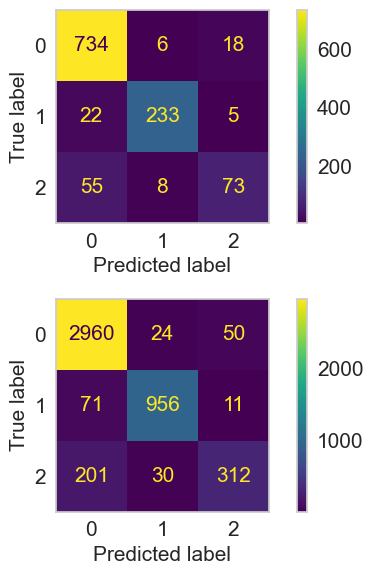

In [156]:
eval_metric(
    pipe_log, X_train, y_train, X_test, y_test, 
    'Logistic Regression', average=None, labels=[2]
)

### Cross Validate Model
* Use the cross_val_score function to evaluate the model using the train set.

In [75]:
# import sklearn 
# sklearn.metrics.SCORERS.keys()

In [76]:
from sklearn.model_selection import cross_validate, cross_val_score

log_model = LogisticRegression(random_state=random_state)

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
]) 
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.6385
test_recall_2      0.5378
test_precision_2   0.7940
dtype: float64

### With Best Parameters (GridsearchCV)

- optuna, halwing grid

In [157]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

log_model = LogisticRegression(random_state=random_state)

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
])
param_grid = {
    "log__penalty" : ['l1'],
    "log__C" : np.linspace(4, 5, 3),
    "log__class_weight" : ["balanced"],
    "log__solver" : ['liblinear', 'sag', 'saga', 'lbfgs'], # ['liblinear', 'sag', 'saga', 'lbfgs', 'newton-cg']
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    scoring=recall_2, # 'f1_macro'
#     error_score="raise",
    n_jobs=-1,
    cv=5
) 
# grid_model.estimator.get_params().keys()

In [158]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 6.11 s
Wall time: 1min 11s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('log',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': array([4. , 4.5, 5. ]),
                         'log__class_weight': ['balanced'],
                         'log__penalty': ['l1'],
                         'log__solver': ['liblinear', 'sag', 'saga', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [159]:
grid_model.best_params_ # default accuracy score

{'log__C': 4.5,
 'log__class_weight': 'balanced',
 'log__penalty': 'l1',
 'log__solver': 'saga'}

In [162]:
grid_model.best_score_

0.7625722052327558

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       758
           1       0.92      0.92      0.92       260
           2       0.56      0.81      0.66       136

    accuracy                           0.88      1154
   macro avg       0.81      0.87      0.83      1154
weighted avg       0.90      0.88      0.89      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3034
           1       0.93      0.95      0.94      1038
           2       0.55      0.85      0.67       543

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



accuracy_test  f1_test  recall_test  precision_test  \
Logistic Regression         0.8795   0.6627       0.8088          0.5612   

                     accuracy_train  f1_train  recall_train  precision_train  
Logistic Regression          0.8810    0.6676        0.8545           0.5478

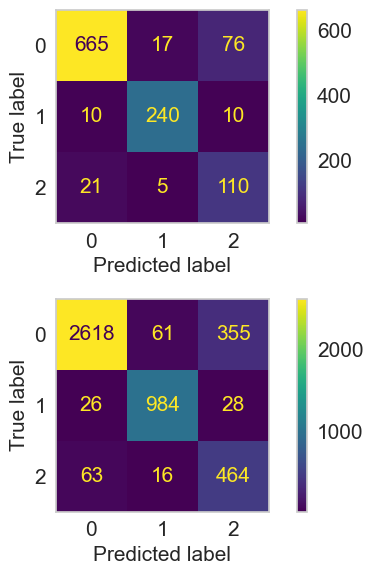

In [163]:
out_score_log = eval_metric(
    grid_model, X_train, y_train, X_test, y_test,
    'Logistic Regression', average=None, labels=[2]
)
out_score_log

# Distance Based Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Implement K-Nearest Neighbors(KNN) Model

In [164]:
# !pip install threadpoolctl==3.1.0

In [165]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

knn_model = KNeighborsClassifier() 

# pipeline for KNeighbors Classifier regression
pipe_knn = Pipeline([
    ("OneHotEncoder",column_trans),
    ("knn", knn_model)
]) 
pipe_knn.fit(X_train , y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('knn', KNeighborsClassifier())])

TEST REPORT
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       758
           1       0.80      0.57      0.66       260
           2       0.65      0.36      0.46       136

    accuracy                           0.78      1154
   macro avg       0.75      0.62      0.66      1154
weighted avg       0.78      0.78      0.77      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      3034
           1       0.89      0.65      0.75      1038
           2       0.86      0.51      0.64       543

    accuracy                           0.84      4615
   macro avg       0.86      0.71      0.76      4615
weighted avg       0.85      0.84      0.83      4615



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
knn         0.7842   0.4645       0.3603          0.6533          0.8420   

     f1_train  recall_train  precision_train  
knn    0.6429        0.5138           0.8585

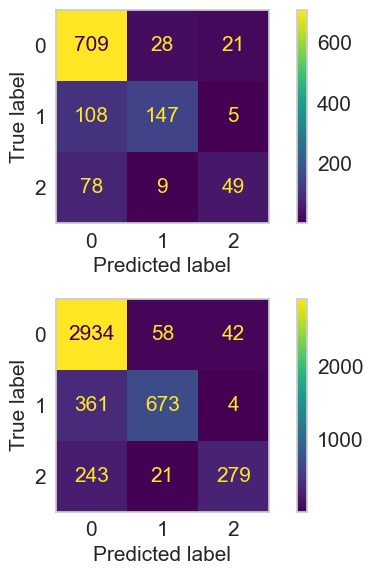

In [166]:
eval_metric(
    pipe_knn, X_train, y_train, X_test, y_test, 
    'knn', average=None, labels=[2]
)

### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

In [215]:
# find error rates
test_error_rates = []
test_error_ratescv = []
K = range(2,22)

for k in K: 
    knn_model = KNeighborsClassifier(n_neighbors=k) 
    # pipeline for KNeighbors Classifier regression
    pipe_knn = Pipeline([
        ("OneHotEncoder",column_trans),
        ("knn", knn_model)
    ]) 
    pipe_knn.fit(X_train , y_train) 
    y_pred_test = pipe_knn.predict(X_test)
    # test setindeki hatayı bulmak için
    test_error = 1-accuracy_score(y_test, y_pred_test)  
    test_error_rates.append(test_error)
    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    # pipeline for Cross Validate
    model = Pipeline([
        ("OneHotEncoder",column_trans),
        ("knn", knn_model)
    ])     
    scoring = {
        "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
        "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
        "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
    }
    scores = cross_validate(
        model, X_train, y_train, 
        scoring = scoring, 
        error_score="raise",
        n_jobs=-1,
        cv = 10,
    )
#     df_scores = pd.DataFrame.from_dict(scores, orient='columns')
#     print(df_scores)
    accuracy_mean = scores["test_recall_2"].mean() 
    test_error = 1-accuracy_mean 
    test_error_ratescv.append(test_error)

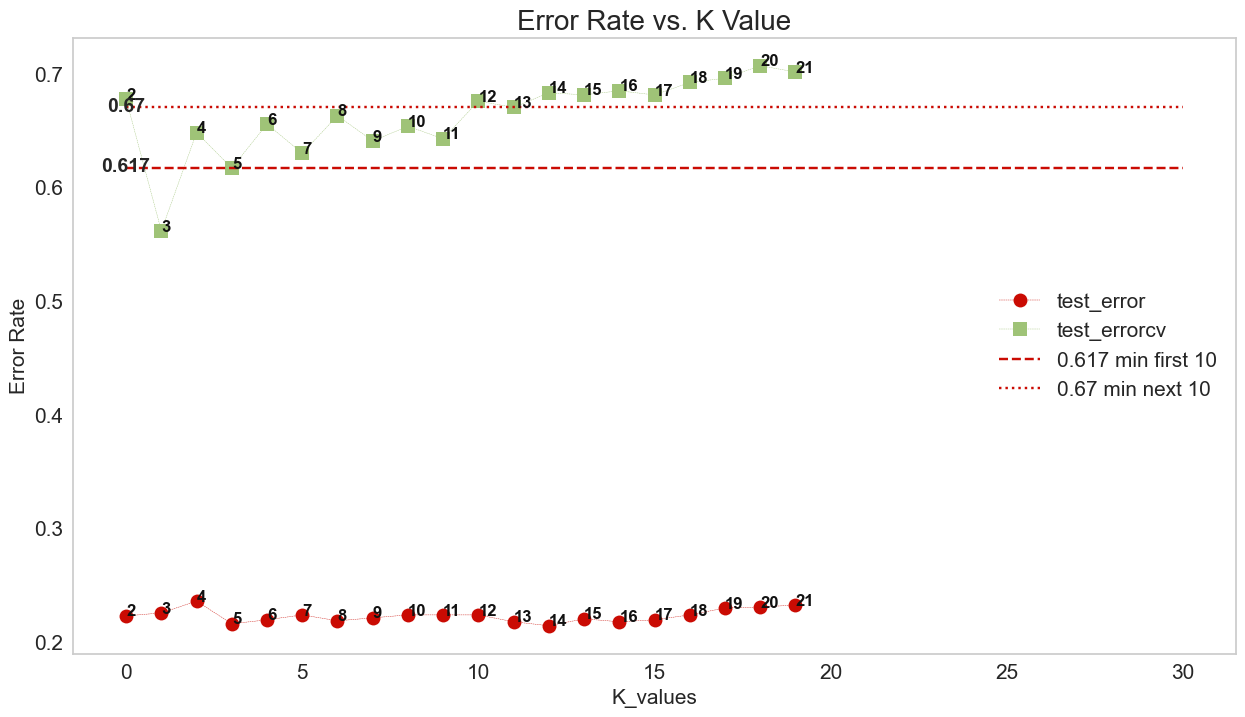

In [223]:
# plot        
plt.figure(figsize=(15,8))

plt.plot(
    test_error_rates, 
    color='r', ls='--', lw=0.3, 
    marker='o',mfc='r', ms=10,
    label='test_error',
)
for k, coor in zip(K, enumerate(test_error_rates)):
    plt.annotate(k, coor, size=12, color='k', weight='heavy') 
    
plt.plot(
    test_error_ratescv, 
    color='g', ls='--', lw=0.3,
    marker='s',mfc='g', ms=10,
    label='test_errorcv',
)
for k, coor in zip(K, enumerate(test_error_ratescv)):
    plt.annotate(k, coor, size=12, color='k', weight='heavy') 
    
plt.text(0, y=min(test_error_ratescv[2:10])+0.001, s=min(test_error_ratescv[2:10]).round(3), 
    fontsize=14, weight='bold', ha='center', va='center',rotation='horizontal',
)
plt.hlines(y=min(test_error_ratescv[2:10]), label=f'{min(test_error_ratescv[2:10]).round(3)} min first 10',
    xmin=0, xmax=30, colors='r', ls="--", 
)
plt.text(0, y=min(test_error_ratescv[10:20])+0.001, s=min(test_error_ratescv[10:20]).round(3), 
    fontsize=14, weight='bold', ha='center', va='center',rotation='horizontal',
)
plt.hlines(min(test_error_ratescv[10:20]), label=f'{min(test_error_ratescv[10:20]).round(3)} min next 10',
    xmin=0, xmax=30, colors='r', ls=":", 
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(loc='center right')

### Overfiting and underfiting control for k values

In [217]:
def elbow_method(K):
    test_error_rates = []
    train_error_rates = []

    for k in K: 
        knn_model = KNeighborsClassifier(n_neighbors=k)
        # pipeline for KNeighbors Classifier regression
        pipe_knn = Pipeline([
            ("OneHotEncoder",column_trans),
            ("knn", knn_model)
        ]) 
        pipe_knn.fit(X_train , y_train)
        y_pred_test = pipe_knn.predict(X_test)
        y_pred_train = pipe_knn.predict(X_train)
        
        # test setindeki hatayı bulmak için
        test_error = 1-accuracy_score(y_test, y_pred_test)  
        train_error = 1-accuracy_score(y_train, y_pred_train)
        test_error_rates.append(test_error)
        train_error_rates.append(train_error)
        
    return test_error_rates, train_error_rates

test_error_rates, train_error_rates = elbow_method(K)

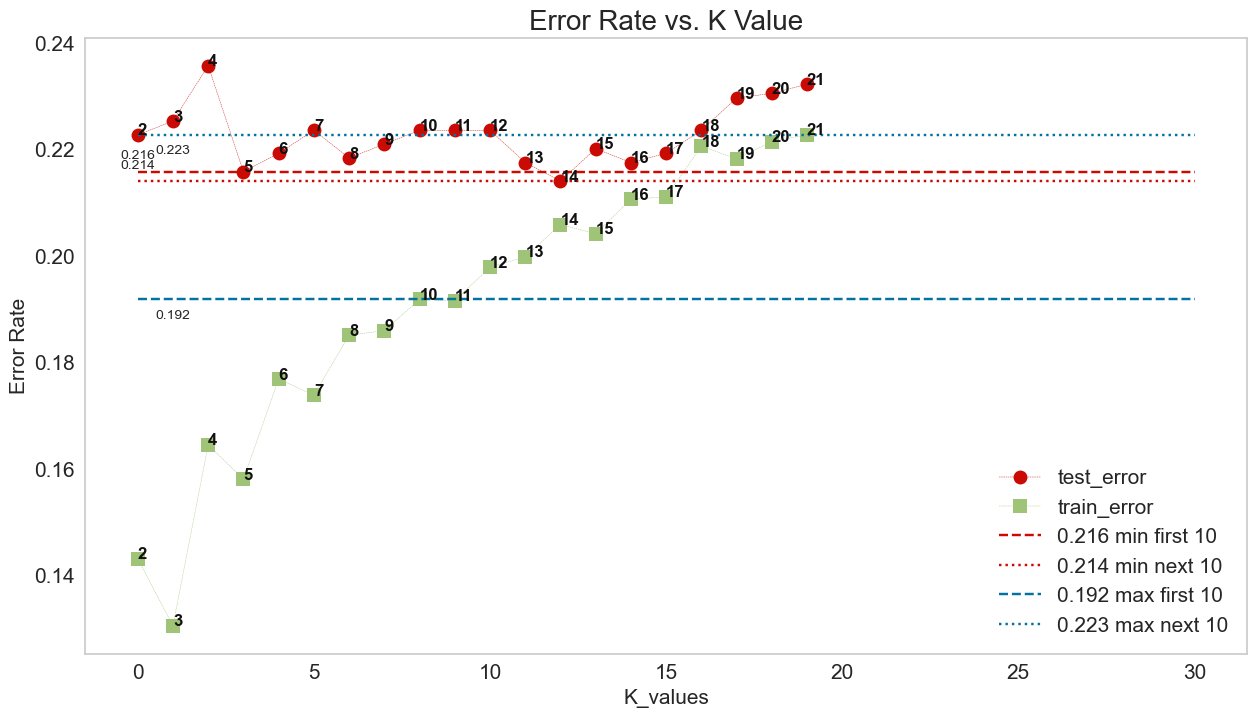

In [224]:
# plot 
plt.figure(figsize=(15,8))
plt.plot(
    test_error_rates, 
    color='r', ls='--', lw=0.3, 
    marker='o', mfc='r', ms=10,
    label='test_error',
)      
for k, coor in zip(K, enumerate(test_error_rates)):
    plt.annotate(k, coor, size=12, color='k', weight='heavy') 
    
plt.plot(
    train_error_rates, 
    color='g', ls='--', lw=0.3,
    marker='s', mfc='g', ms=10,
    label='train_error',
)     
for k, coor in zip(K, enumerate(train_error_rates)):
    plt.annotate(k, coor, size=12, color='k', weight='heavy') 
    
# test first 10 point, next 10
plt.text(0, y=min(test_error_rates[2:10])+0.003, s=min(test_error_rates[2:10]).round(3),
    fontsize=10, ha='center', va='center',rotation='horizontal'
)
plt.hlines(y=min(test_error_rates[2:10]), label=f'{min(test_error_rates[2:10]).round(3)} min first 10',
    xmin=0, xmax=30, colors= 'r', linestyles="--", 
)
plt.text(0, y=min(test_error_rates[10:20])+0.003, s=min(test_error_rates[10:20]).round(3),
    fontsize=10, ha='center', va='center',rotation='horizontal'
)
plt.hlines(y=min(test_error_rates[10:20]), label=f'{min(test_error_rates[10:20]).round(3)} min next 10',
    xmin=0, xmax=30, colors= 'r', linestyles=":", 
)
# train first 10 point, next 10
plt.text(1, y=max(train_error_rates[2:10])-0.003, s=max(train_error_rates[2:10]).round(3),
    fontsize=10, ha='center', va='center',rotation='horizontal',
)
plt.hlines(y=max(train_error_rates[2:10]), label=f'{max(train_error_rates[2:10]).round(3)} max first 10',
    xmin=0, xmax=30, colors= 'b', linestyles="--", 
)
plt.text(1, y=max(train_error_rates[10:20])-0.003, s=max(train_error_rates[10:20]).round(3),
    fontsize=10, ha='center', va='center',rotation='horizontal'
)
plt.hlines(y=max(train_error_rates[10:20]), label=f'{max(train_error_rates[10:20]).round(3)} max next 10',
    xmin=0, xmax=30, colors= 'b', linestyles=":", 
)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.legend(loc='lower right')
plt.show()

### Cross Validate Model

In [239]:
from sklearn.model_selection import cross_validate, cross_val_score

knn_model = KNeighborsClassifier(n_neighbors=5) 

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("knn", knn_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.4987
test_recall_2      0.3849
test_precision_2   0.7167
dtype: float64

### With Best Parameters (GridsearchCV)

In [240]:
from sklearn.model_selection import GridSearchCV

knn_model = KNeighborsClassifier()  

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("knn", knn_model)
])
param_grid = {
    'knn__n_neighbors': range(3,9),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['minkowski'],
    'knn__p': [1,2],
#     'knn__leaf_size': [30],
#     'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_2,
    n_jobs=-1,
    cv=5
) 
# grid_model.estimator.get_params().keys()

In [241]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 812 ms
Wall time: 20.3 s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['minkowski'],
                         'knn__n_neighbors': range(3, 9), 'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [242]:
grid_model.best_params_

{'knn__metric': 'minkowski',
 'knn__n_neighbors': 3,
 'knn__p': 2,
 'knn__weights': 'distance'}

In [243]:
grid_model.best_score_

0.44753652735304106

TEST REPORT
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       758
           1       0.75      0.60      0.67       260
           2       0.52      0.45      0.48       136

    accuracy                           0.77      1154
   macro avg       0.69      0.65      0.67      1154
weighted avg       0.77      0.77      0.77      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



accuracy_test  f1_test  recall_test  precision_test  \
K-Nearest Neighbors         0.7730   0.4803       0.4485          0.5169   

                     accuracy_train  f1_train  recall_train  precision_train  
K-Nearest Neighbors          1.0000    1.0000        1.0000           1.0000

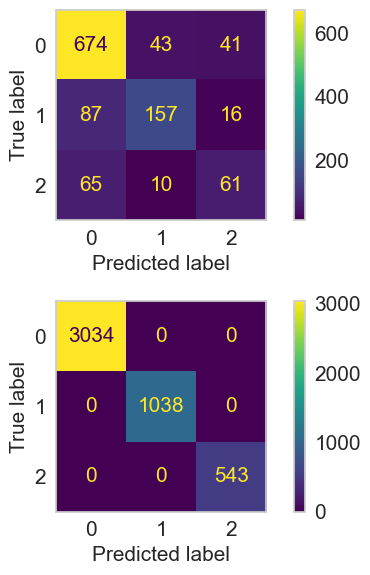

In [245]:
out_score_knn = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'K-Nearest Neighbors', average=None, labels=[2]
)
out_score_knn

## 2. Implement Support Vector Machine Model

### Vanilla  LinearSVC model 

In [246]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

svc_model = LinearSVC(random_state=random_state)   

# pipeline for SVC regression
pipe_svc = Pipeline([
    ("OneHotEncoder",column_trans),
    ("svc", svc_model)
]) 
pipe_svc.fit(X_train , y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('svc', LinearSVC(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       758
           1       0.92      0.92      0.92       260
           2       0.85      0.54      0.66       136

    accuracy                           0.91      1154
   macro avg       0.89      0.81      0.84      1154
weighted avg       0.91      0.91      0.90      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3034
           1       0.95      0.94      0.94      1038
           2       0.86      0.56      0.68       543

    accuracy                           0.92      4615
   macro avg       0.91      0.82      0.86      4615
weighted avg       0.92      0.92      0.91      4615



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
SVC         0.9090   0.6637       0.5441          0.8506          0.9194   

     f1_train  recall_train  precision_train  
SVC    0.6756        0.5562           0.8604

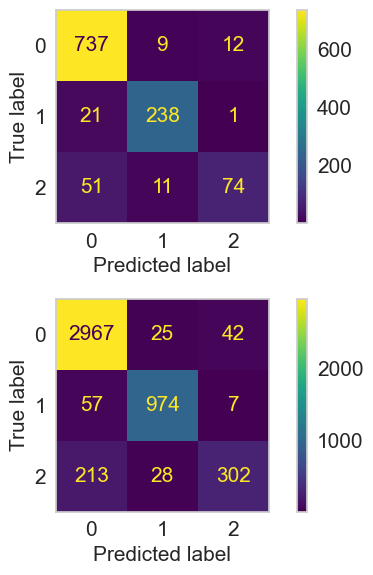

In [247]:
eval_metric(
    pipe_svc, X_train, y_train, X_test, y_test, 
    'SVC', average=None, labels=[2]
)

### Cross Validate Model

In [248]:
from sklearn.model_selection import cross_validate, cross_val_score

svc_model = LinearSVC(random_state=random_state)  

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("svc", svc_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.6365
test_recall_2      0.5213
test_precision_2   0.8272
dtype: float64

### With Best Parameters (GridsearchCV)

In [250]:
from sklearn.model_selection import GridSearchCV

# probability True to obtain ROC etc.
svc_model = SVC(probability=True, random_state=random_state)  

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("svc", svc_model)
])
param_grid = {
    'svc__C': np.linspace(2, 3, 3),
    'svc__gamma': ["scale"], # ['scale', 'auto', 0.1, 1]
#     'svc__kernel': ['poly'], # ['linear', 'poly', 'rbf']
#     'svc__degree': [2],
    'svc__class_weight': ['balanced'], # [None, "balanced"]
    'svc__decision_function_shape': ['ovo'], # ['ovo', 'ovr']
     
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_2,
    n_jobs=-1,
    cv=5
) 
# grid_model.estimator.get_params().keys()

In [251]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 18.8 s
Wall time: 4min 37s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': array([0.1  , 1.325, 2.55 , 3.775, 5.   ]),
                         'svc__class_weight': ['balanced'],
                         'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__gamma': ['scale']},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [252]:
grid_model.best_params_

{'svc__C': 2.5500000000000003,
 'svc__class_weight': 'balanced',
 'svc__decision_function_shape': 'ovo',
 'svc__gamma': 'scale'}

In [253]:
grid_model.best_score_

0.7606693849813115

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       758
           1       0.91      0.92      0.92       260
           2       0.54      0.77      0.63       136

    accuracy                           0.87      1154
   macro avg       0.80      0.86      0.82      1154
weighted avg       0.90      0.87      0.88      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      3034
           1       0.94      0.94      0.94      1038
           2       0.56      0.87      0.68       543

    accuracy                           0.89      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.89      0.89      4615



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
SVC         0.8744   0.6325       0.7721          0.5357          0.8852   

     f1_train  recall_train  precision_train  
SVC    0.6781        0.8711           0.5552

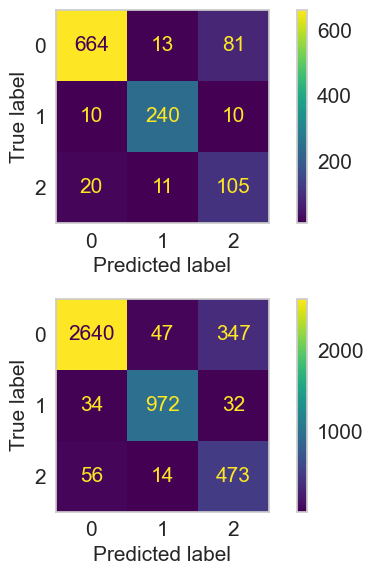

In [254]:
out_score_svc = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'SVC', average=None, labels=[2]
)
out_score_svc

## 3. Implement Bagging Classifier - Support Vector Machine Model

### Vanilla  Bagging - LinearSVC model 

In [255]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

svc_model = LinearSVC(random_state=random_state)  
bag_svc_model = BaggingClassifier(svc_model) 

# pipeline for SVC regression
pipe_bag_svc = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
]) 
pipe_bag_svc.fit(X_train , y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('bag_svc',
                 BaggingClassifier(base_estimator=LinearSVC(random_state=42)))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       758
           1       0.92      0.90      0.91       260
           2       0.84      0.54      0.66       136

    accuracy                           0.91      1154
   macro avg       0.89      0.81      0.84      1154
weighted avg       0.90      0.91      0.90      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3034
           1       0.95      0.93      0.94      1038
           2       0.85      0.56      0.67       543

    accuracy                           0.92      4615
   macro avg       0.90      0.82      0.85      4615
weighted avg       0.91      0.92      0.91      4615



accuracy_test  f1_test  recall_test  precision_test  \
Bagging SVC         0.9064   0.6607       0.5441          0.8409   

             accuracy_train  f1_train  recall_train  precision_train  
Bagging SVC          0.9174    0.6719        0.5562           0.8483

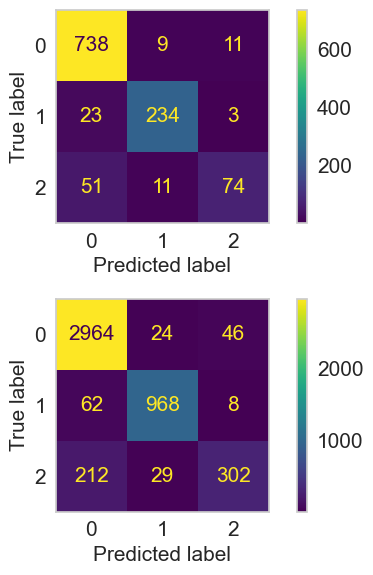

In [256]:
eval_metric(
    pipe_bag_svc, X_train, y_train, X_test, y_test, 
    'Bagging SVC', average=None, labels=[2]
)

### Cross Validate Model

In [257]:
from sklearn.model_selection import cross_validate, cross_val_score

svc_model = LinearSVC(random_state=random_state)  
bag_svc_model = BaggingClassifier(svc_model)

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.6350
test_recall_2      0.5268
test_precision_2   0.8051
dtype: float64

### With Best Parameters (GridsearchCV)

In [263]:
from sklearn.model_selection import GridSearchCV

# probability True to obtain ROC etc.
svc_model = SVC(probability=True, random_state=random_state)  
bag_svc_model = BaggingClassifier(svc_model) 

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("bag_svc", bag_svc_model)
])
param_grid = {
    # BaggingClassifier # n_estimators*max_samples > data
    'bag_svc__n_estimators': [5],
    'bag_svc__max_samples': [1.0],
    # SVC
    'bag_svc__base_estimator__C': np.linspace(3, 4, 2),
#     'bag_svc__base_estimator__gamma': ['scale'],
#     'bag_svc__base_estimator__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#     'bag_svc__base_estimator__degree': [2],
    'bag_svc__base_estimator__class_weight': ['balanced'], # [None, "balanced"]
    'bag_svc__base_estimator__decision_function_shape': ['ovo'], # ['ovo', 'ovr']
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_2,
    n_jobs=-1,
    cv=5
) 
# grid_model.estimator.get_params().keys()

In [264]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 30.1 s
Wall time: 1min 54s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('bag_svc',
                                        BaggingClassifier(base_estimator=SVC(probability=True,
                                                                             random_state=42)))]),
             n_jobs=-1,
             param_grid={'bag_svc__base_estimator__C': array([3., 4.]),
                         'bag_svc__base_estimator__class_weight': ['balanced'],
                         'bag_svc__base_estimator__decision_function_shape': ['ovo'],
                         'bag_svc__max_samples': [1.0],
                         'bag_svc__n_estimators': [5]},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [265]:
grid_model.best_params_

{'bag_svc__base_estimator__C': 3.0,
 'bag_svc__base_estimator__class_weight': 'balanced',
 'bag_svc__base_estimator__decision_function_shape': 'ovo',
 'bag_svc__max_samples': 1.0,
 'bag_svc__n_estimators': 5}

In [266]:
grid_model.best_score_

0.5028542303771661

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       758
           1       0.92      0.91      0.92       260
           2       0.79      0.50      0.61       136

    accuracy                           0.90      1154
   macro avg       0.87      0.79      0.82      1154
weighted avg       0.90      0.90      0.89      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3034
           1       0.95      0.94      0.94      1038
           2       0.83      0.61      0.70       543

    accuracy                           0.92      4615
   macro avg       0.90      0.84      0.86      4615
weighted avg       0.92      0.92      0.92      4615



accuracy_test  f1_test  recall_test  precision_test  \
Bagging SVC         0.9003   0.6126       0.5000          0.7907   

             accuracy_train  f1_train  recall_train  precision_train  
Bagging SVC          0.9213    0.7006        0.6077           0.8271

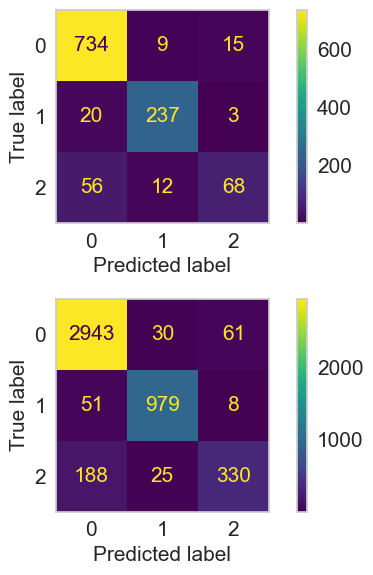

In [267]:
out_score_bag_svc = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Bagging SVC', average=None, labels=[2]
)
out_score_bag_svc

# Tree Based Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

In [268]:
df = pd.read_csv("ansurII_2.csv")
df.shape

(5769, 98)

In [269]:
df.info(max_cols=5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Columns: 98 entries, abdominalextensiondepthsitting to WritingPreference
dtypes: int64(95), object(3)
memory usage: 4.3+ MB


In [270]:
X = df.drop(columns=['DODRace'])
y = df['DODRace']

### Train | Test Split

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

### `OrdinalEncoder` for Decision Tree Classifier Based Models

In [272]:
# way-1
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

cat = X_train.select_dtypes("object").columns.to_list()    
column_trans = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), cat), 
    remainder='passthrough'
)

In [273]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pd.DataFrame(y_test).value_counts().sort_index()

0    758
1    260
2    136
dtype: int64

## 1. Implement Decision Tree Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla DT Model

In [274]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(random_state=random_state)

# pipeline for DecisionTree Classifier
pipe_dt = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])
pipe_dt.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('dt', DecisionTreeClassifier(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       758
           1       0.63      0.66      0.64       260
           2       0.18      0.21      0.20       136

    accuracy                           0.68      1154
   macro avg       0.54      0.55      0.54      1154
weighted avg       0.69      0.68      0.68      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



accuracy_test  f1_test  recall_test  precision_test  \
Decision Tree         0.6776   0.1959       0.2132          0.1812   

               accuracy_train  f1_train  recall_train  precision_train  
Decision Tree          1.0000    1.0000        1.0000           1.0000

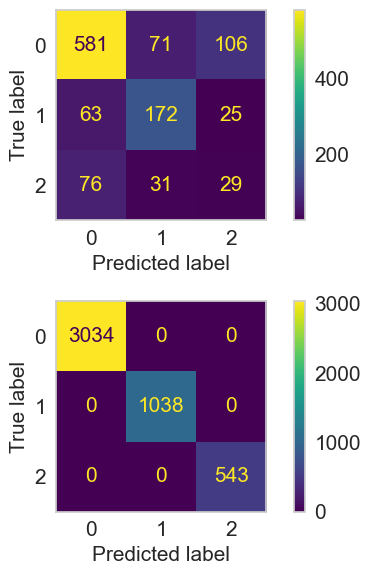

In [275]:
eval_metric(
    pipe_dt, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)

### Cross Validate Model

In [276]:
from sklearn.model_selection import cross_validate, cross_val_score

dt_model = DecisionTreeClassifier(random_state=random_state)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.1993
test_recall_2      0.2044
test_precision_2   0.1949
dtype: float64

### With Best Parameters (GridsearchCV)

In [277]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=random_state)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("dt", dt_model)
])
param_grid = {
    "dt__class_weight" : ["balanced"], # [None, "balanced"]
    "dt__criterion" : ["gini", "entropy", "log_loss"], 
    "dt__splitter": ["best"], # ["best", "random"]
    "dt__max_features":["auto", "log2"], # [None, "auto", "log2", .3, .5]
    "dt__max_depth": [None, 1, 2],
    "dt__min_samples_split": [2, 3],
    "dt__min_samples_leaf": [1, 2, 3],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    error_score="raise",
    scoring=recall_2, 
    n_jobs=-1,
    cv=5,
)

In [278]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 2.08 s
Wall time: 6.09 s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__class_weight': ['balanced'],
                         'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [None, 1, 2],
                         'dt__max_features': ['auto', 'log2'],
                         'dt__min_samples_leaf': [1, 2, 3],
                         'dt__min_samples_split': [2, 3],
                         'dt__splitter': ['best']},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [279]:
grid_model.best_params_

{'dt__class_weight': 'balanced',
 'dt__criterion': 'entropy',
 'dt__max_depth': 1,
 'dt__max_features': 'log2',
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__splitter': 'best'}

In [280]:
grid_model.best_score_

0.8949711179068978

TEST REPORT
              precision    recall  f1-score   support

           0       0.78      0.34      0.47       758
           1       0.00      0.00      0.00       260
           2       0.14      0.87      0.25       136

    accuracy                           0.33      1154
   macro avg       0.31      0.40      0.24      1154
weighted avg       0.53      0.33      0.34      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.77      0.31      0.44      3034
           1       0.00      0.00      0.00      1038
           2       0.14      0.90      0.25       543

    accuracy                           0.31      4615
   macro avg       0.30      0.40      0.23      4615
weighted avg       0.52      0.31      0.32      4615



accuracy_test  f1_test  recall_test  precision_test  \
Decision Tree         0.3267   0.2466       0.8676          0.1437   

               accuracy_train  f1_train  recall_train  precision_train  
Decision Tree          0.3112    0.2494        0.9024           0.1447

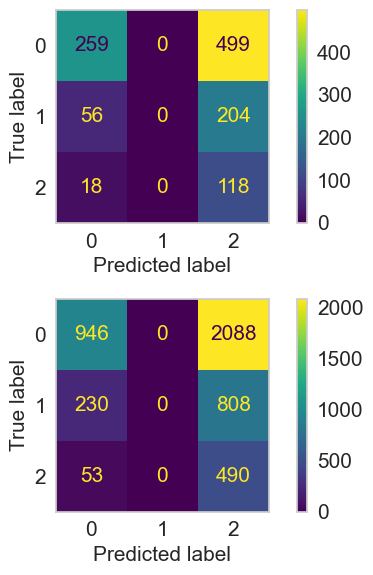

In [281]:
out_score_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Decision Tree', average=None, labels=[2]
)
out_score_dt

## 2. Implement Bagging Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla Bagging - Decision Tree Model

In [282]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline

dt_model = DecisionTreeClassifier(random_state=random_state)
bag_dt_model = BaggingClassifier(dt_model)

# pipeline for Bagging Classifier
pipe_bag_dt = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("bag_dt", bag_dt_model)
])
pipe_bag_dt.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('bag_dt',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42)))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       758
           1       0.79      0.73      0.76       260
           2       0.32      0.08      0.13       136

    accuracy                           0.79      1154
   macro avg       0.64      0.58      0.59      1154
weighted avg       0.75      0.79      0.76      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3034
           1       0.99      0.99      0.99      1038
           2       1.00      0.91      0.95       543

    accuracy                           0.99      4615
   macro avg       0.99      0.97      0.98      4615
weighted avg       0.99      0.99      0.99      4615



accuracy_test  f1_test  recall_test  precision_test  \
Bagging Decision Tree         0.7912   0.1294       0.0809          0.3235   

                       accuracy_train  f1_train  recall_train  precision_train  
Bagging Decision Tree          0.9863    0.9519        0.9116           0.9960

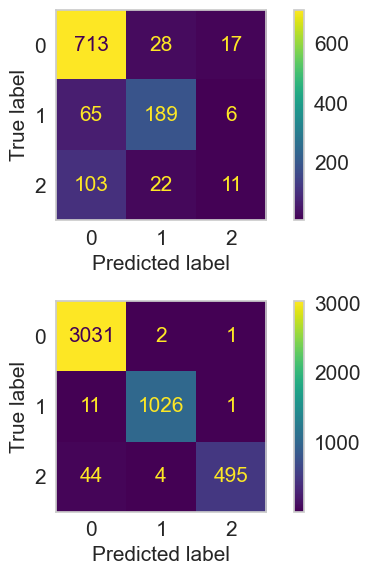

In [283]:
eval_metric(
    pipe_bag_dt, X_train, y_train, X_test, y_test, 
    'Bagging Decision Tree', average=None, labels=[2]
)

### Cross Validate Model

In [284]:
from sklearn.model_selection import cross_validate, cross_val_score

dt_model = DecisionTreeClassifier(random_state=random_state)
bag_dt_model = BaggingClassifier(dt_model)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("bag_dt", bag_dt_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.1303
test_recall_2      0.0810
test_precision_2   0.3430
dtype: float64

### With Best Parameters (GridsearchCV)

{'dt__class_weight': 'balanced',
 'dt__criterion': 'entropy',
 'dt__max_depth': 1,
 'dt__max_features': 'log2',
 'dt__min_samples_leaf': 1,
 'dt__min_samples_split': 2,
 'dt__splitter': 'best'}

In [365]:
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=random_state)
bag_dt_model = BaggingClassifier(dt_model)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("bag_dt", bag_dt_model)
])
param_grid = {
    # BaggingClassifier
    "bag_dt__n_estimators": [45],
    "bag_dt__max_samples": [1.0],
    # DecisionTreeClassifier
    "bag_dt__base_estimator__class_weight" : ["balanced"], # [None, "balanced"]
    "bag_dt__base_estimator__criterion" : ["gini", "entropy", "log_loss"], 
    "bag_dt__base_estimator__splitter":["best"], # ["best", "random"]
    "bag_dt__base_estimator__max_depth": [1],
    "bag_dt__base_estimator__max_features":["log2"], # [None, "auto", "log2", .3, .5]
    "bag_dt__base_estimator__min_samples_split": [2],
    "bag_dt__base_estimator__min_samples_leaf": [3],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    error_score="raise",
    scoring=recall_2, 
    n_jobs=-1,
    cv=5,
)
# grid_model.estimator.get_params().keys()

In [366]:
%%time
grid_model.fit(X_train, y_train)

CPU times: total: 625 ms
Wall time: 2.51 s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('bag_dt',
                                        BaggingClassifier(base_estimator=DecisionTreeClassifier(r...
                                                               'log_loss'],
                         'bag_dt__base_estimator__max_depth': [1],
                         'bag_dt__base_estimator__max_features': ['log2'],
                         'bag_dt__base_estimator__min_samples_leaf': [3],
                         'bag_dt__base_estimator__min_samples_split': [2],
                         'bag_dt__base_estimator__splitter': ['best'],
                         'bag_dt__max_samples': [1.0],
                         'bag_dt__n_estimators': [45]},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [367]:
grid_model.best_params_

{'bag_dt__base_estimator__class_weight': 'balanced',
 'bag_dt__base_estimator__criterion': 'log_loss',
 'bag_dt__base_estimator__max_depth': 1,
 'bag_dt__base_estimator__max_features': 'log2',
 'bag_dt__base_estimator__min_samples_leaf': 3,
 'bag_dt__base_estimator__min_samples_split': 2,
 'bag_dt__base_estimator__splitter': 'best',
 'bag_dt__max_samples': 1.0,
 'bag_dt__n_estimators': 45}

In [368]:
grid_model.best_score_

0.7496941896024466

TEST REPORT
              precision    recall  f1-score   support

           0       0.91      0.35      0.51       758
           1       0.52      0.52      0.52       260
           2       0.18      0.78      0.29       136

    accuracy                           0.44      1154
   macro avg       0.54      0.55      0.44      1154
weighted avg       0.73      0.44      0.48      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.89      0.34      0.49      3034
           1       0.56      0.55      0.56      1038
           2       0.17      0.77      0.28       543

    accuracy                           0.44      4615
   macro avg       0.54      0.55      0.44      4615
weighted avg       0.73      0.44      0.48      4615



accuracy_test  f1_test  recall_test  precision_test  \
Bagging Decision Tree         0.4393   0.2869       0.7794          0.1758   

                       accuracy_train  f1_train  recall_train  precision_train  
Bagging Decision Tree          0.4384    0.2819        0.7735           0.1723

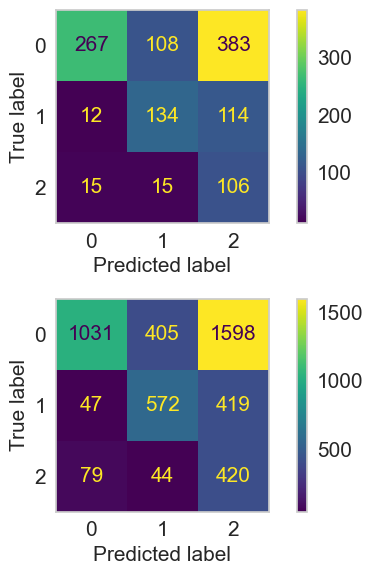

In [369]:
out_score_bag_dt = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Bagging Decision Tree', average=None, labels=[2]
)
out_score_bag_dt

## 3. Implement RF Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla RF Model

In [370]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline

rfc_model = RandomForestClassifier(random_state=random_state)

# pipeline for Random Forest Classifier
pipe_rfc = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])
pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('rfc', RandomForestClassifier(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       758
           1       0.63      0.66      0.64       260
           2       0.18      0.21      0.20       136

    accuracy                           0.68      1154
   macro avg       0.54      0.55      0.54      1154
weighted avg       0.69      0.68      0.68      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



accuracy_test  f1_test  recall_test  precision_test  \
Random Forest         0.6776   0.1959       0.2132          0.1812   

               accuracy_train  f1_train  recall_train  precision_train  
Random Forest          1.0000    1.0000        1.0000           1.0000

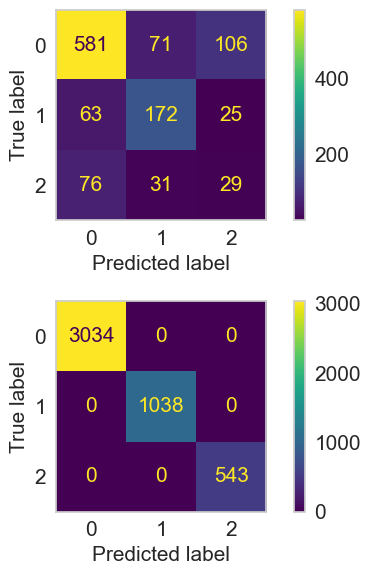

In [371]:
eval_metric(
    pipe_dt, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=[2]
)

### Cross Validate Model

In [372]:
from sklearn.model_selection import cross_validate, cross_val_score

rfc_model = RandomForestClassifier(random_state=random_state)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.0925
test_recall_2      0.0497
test_precision_2   0.7117
dtype: float64

### With Best Parameters (GridsearchCV)

In [373]:
from sklearn.model_selection import GridSearchCV

rfc_model = RandomForestClassifier(random_state=random_state)

# pipeline for GridsearchCV
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("rfc", rfc_model)
])
param_grid = {
    'rfc__max_depth': [1,2], 
    'rfc__n_estimators': [10],
    'rfc__criterion': ["gini", "entropy", "log_loss"],
#     'rfc__max_features': [None, 'auto', .1, .2],
    'rfc__class_weight': ['balanced'], # [None, 'balanced']
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_2,
    refit=True,
    verbose=2,
    n_jobs=-1,
    cv=5,
)

In [374]:
%%time
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 219 ms
Wall time: 968 ms


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rfc__class_weight': ['balanced'],
                         'rfc__criterion': ['gini', 'entropy', 'log_loss'],
                         'rfc__max_depth': [1, 2], 'rfc__n_estimators': [10]},
             scoring=make_scorer(recall_score, average=None, labels=[2]),
             verbose=2)

In [375]:
grid_model.best_params_

{'rfc__class_weight': 'balanced',
 'rfc__criterion': 'entropy',
 'rfc__max_depth': 1,
 'rfc__n_estimators': 10}

In [376]:
grid_model.best_score_

0.7588854909955828

TEST REPORT
              precision    recall  f1-score   support

           0       0.87      0.24      0.38       758
           1       0.38      0.43      0.41       260
           2       0.16      0.75      0.26       136

    accuracy                           0.35      1154
   macro avg       0.47      0.47      0.35      1154
weighted avg       0.68      0.35      0.37      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.87      0.26      0.39      3034
           1       0.45      0.48      0.47      1038
           2       0.16      0.77      0.26       543

    accuracy                           0.37      4615
   macro avg       0.49      0.50      0.37      4615
weighted avg       0.69      0.37      0.40      4615



accuracy_test  f1_test  recall_test  precision_test  \
Random Forest         0.3458   0.2602       0.7500          0.1574   

               accuracy_train  f1_train  recall_train  precision_train  
Random Forest          0.3660    0.2628        0.7680           0.1585

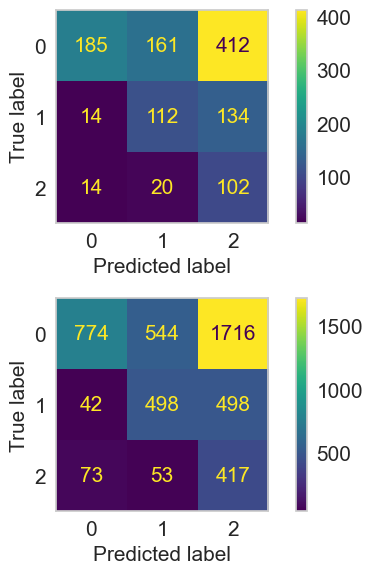

In [377]:
out_score_rfc = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'Random Forest', average=None, labels=[2]
)
out_score_rfc

## 4. Implement XGBoost Classifier Model
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Vanilla XGBoost Model

In [378]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_model = XGBClassifier(random_state=random_state)

# pipeline for XGBClassifier Classifier
pipe_xgb = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
])

In [379]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 1.4820167 , 0.50703142,
       1.4820167 ])

In [380]:
comp = pd.DataFrame(classes_weights)

comp["label"] = pd.DataFrame(y_train).reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label  0     
0      0.5070    3034
1      1.4820    1038
2      2.8330     543
Name: 0, dtype: int64

In [381]:
pipe_xgb.fit(
    X_train, y_train, 
    xgb__sample_weight=classes_weights
)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsampl...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=42, reg_alpha=0, ...))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       758
           1       0.90      0.88      0.89       260
           2       0.78      0.46      0.57       136

    accuracy                           0.89      1154
   macro avg       0.86      0.77      0.80      1154
weighted avg       0.88      0.89      0.88      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3034
           1       1.00      1.00      1.00      1038
           2       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
XGBoost         0.8865   0.5741       0.4559          0.7750          1.0000   

         f1_train  recall_train  precision_train  
XGBoost    1.0000        1.0000           1.0000

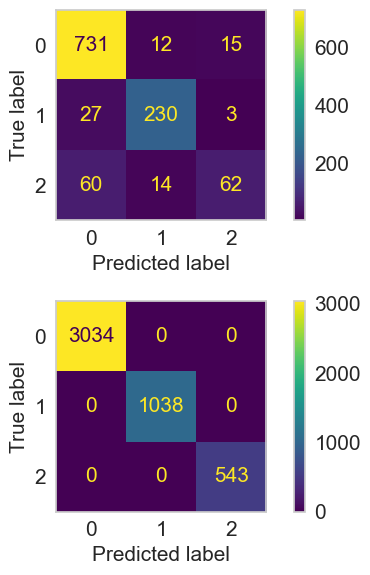

In [382]:
eval_metric(
    pipe_xgb, X_train, y_train, X_test, y_test, 
    'XGBoost', average=None, labels=[2]
)

### Cross Validate Model

In [383]:
from sklearn.model_selection import cross_validate, cross_val_score

xgb_model = XGBClassifier(random_state=random_state)

# pipeline for Cross Validate
model = Pipeline(steps=[
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
])  
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
    fit_params={"xgb__sample_weight":classes_weights}
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.5363
test_recall_2      0.4347
test_precision_2   0.7006
dtype: float64

### With Best Parameters (GridsearchCV)

In [384]:
from sklearn.model_selection import GridSearchCV

xgb_model = XGBClassifier(random_state=random_state)

# pipeline for GridsearchCV
model = Pipeline([
    ("OrdinalEncoder", column_trans), 
    ("xgb", xgb_model)
]) 
param_grid = {
    'xgb__n_estimators':[20],
    'xgb__learning_rate': [0.5],
    'xgb__max_depth':[1,2],
    'xgb__subsample': [1.0],
    'xgb__colsample_bytree': [0.4, 0.7],
    'xgb__min_child_weight' : [5, 8],
#     'xgb__min_split_loss': [1],
#     'xgb__reg_lambda' : [1, 2],
#     'xgb__grow_policy': ['depthwise'],
#     'xgb__eval_metric' : ["merror"],
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    verbose=1,
    scoring=recall_2,
    refit=True,
    n_jobs=-1
)

In [385]:
%%time
grid_model.fit(
    X_train, y_train, 
    xgb__sample_weight=classes_weights
)
# weight parameter in XGBoost is per instance not per class. 
# Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 1.45 s
Wall time: 4.91 s


GridSearchCV(error_score='raise',
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         ['Gender',
                                                                          'SubjectsBirthLocation',
                                                                          'WritingPreference'])])),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsamp...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__colsample_bytree': [0.4, 0.7],
                         'xgb__learning_rate': [0.5], 'xgb__max_depth': [1, 2],
                         'xgb__min_child_weight': [5, 8],
                         'xgb__n_estimators': [20], 'xgb__subsample': [1.0]},
             scoring=make_scorer(recall_score, average=None, labels=[2]),
             verbose=1)

In [386]:
# xgb_grid_model.get_params().keys()
grid_model.best_params_

{'xgb__colsample_bytree': 0.4,
 'xgb__learning_rate': 0.5,
 'xgb__max_depth': 2,
 'xgb__min_child_weight': 5,
 'xgb__n_estimators': 20,
 'xgb__subsample': 1.0}

TEST REPORT
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       758
           1       0.82      0.85      0.83       260
           2       0.38      0.68      0.49       136

    accuracy                           0.79      1154
   macro avg       0.71      0.77      0.72      1154
weighted avg       0.84      0.79      0.80      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.94      0.78      0.85      3034
           1       0.82      0.89      0.85      1038
           2       0.41      0.75      0.53       543

    accuracy                           0.80      4615
   macro avg       0.72      0.80      0.74      4615
weighted avg       0.85      0.80      0.81      4615



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
XGBoost         0.7886   0.4894       0.6765          0.3833          0.7985   

         f1_train  recall_train  precision_train  
XGBoost    0.5322        0.7459           0.4137

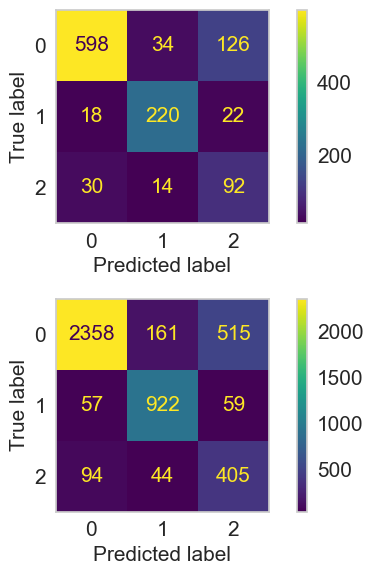

In [387]:
out_score_xgb = eval_metric(
    grid_model, X_train, y_train, X_test, y_test, 
    'XGBoost', average=None, labels=[2]
)
out_score_xgb

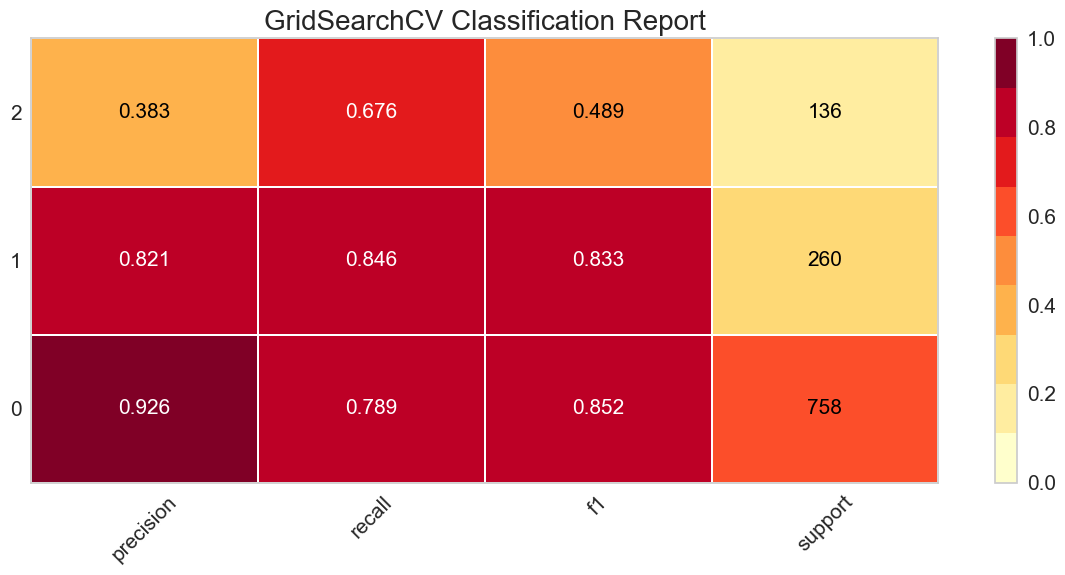

<AxesSubplot:title={'center':'GridSearchCV Classification Report'}>

In [388]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(grid_model, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show()

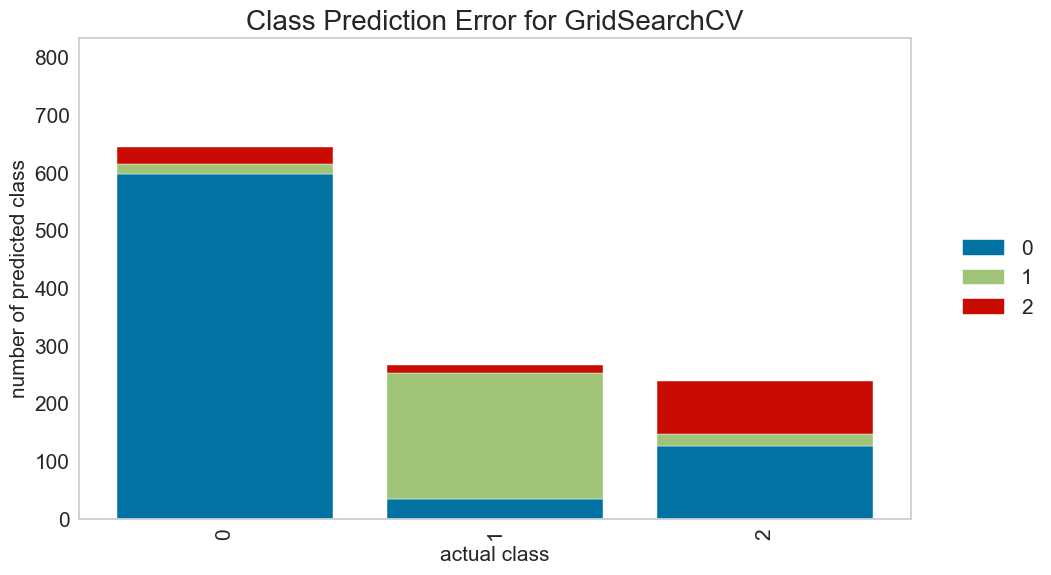

<AxesSubplot:title={'center':'Class Prediction Error for GridSearchCV'}, xlabel='actual class', ylabel='number of predicted class'>

In [389]:
visualizer = ClassPredictionError(grid_model)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)
# Evaluate the model on the test data
visualizer.score(X_test, y_test)
# Draw visualization
visualizer.show()

### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [390]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, auc
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve, average_precision_score

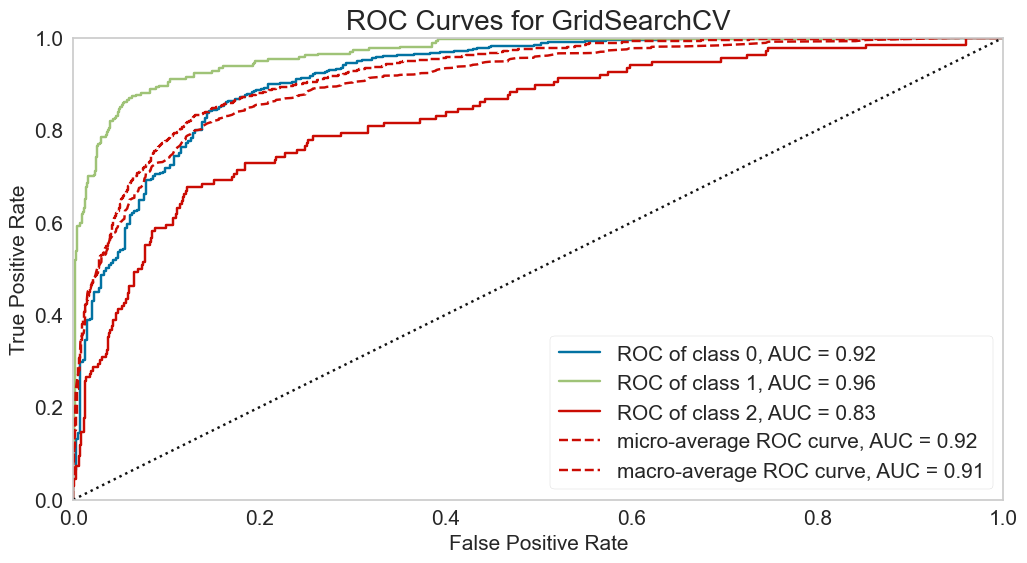

In [391]:
from yellowbrick.classifier import ROCAUC
model = grid_model

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 8 candidates, totalling 40 fits


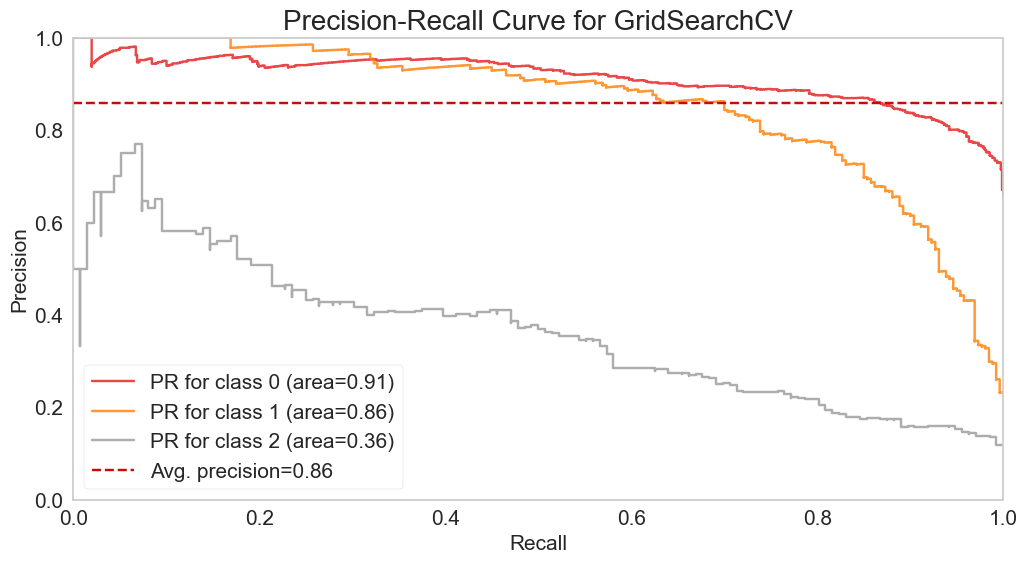

In [392]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

---
---

# Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

In [393]:
compare = pd.concat([
    out_score_log, out_score_knn, out_score_svc, out_score_bag_svc, 
    out_score_dt, out_score_bag_dt, out_score_rfc, out_score_xgb,
])
compare

accuracy_test  f1_test  recall_test  precision_test  \
Logistic Regression           0.8795   0.6627       0.8088          0.5612   
K-Nearest Neighbors           0.7730   0.4803       0.4485          0.5169   
SVC                           0.8744   0.6325       0.7721          0.5357   
Bagging SVC                   0.9003   0.6126       0.5000          0.7907   
Decision Tree                 0.3267   0.2466       0.8676          0.1437   
Bagging Decision Tree         0.4393   0.2869       0.7794          0.1758   
Random Forest                 0.3458   0.2602       0.7500          0.1574   
XGBoost                       0.7886   0.4894       0.6765          0.3833   

                       accuracy_train  f1_train  recall_train  precision_train  
Logistic Regression            0.8810    0.6676        0.8545           0.5478  
K-Nearest Neighbors            1.0000    1.0000        1.0000           1.0000  
SVC                            0.8852    0.6781        0.8711           0.5552  
Bagging SVC                    0.9213    0.7006        0.6077           0.8271  
Decision Tree                  0.3112    0.2494        0.9024           0.1447  
Bagging Decision Tree          0.4384    0.2819        0.7735           0.1723  
Random Forest                  0.3660    0.2628        0.7680           0.1585  
XGBoost                        0.7985    0.5322        0.7459           0.4137

##  Recall Score Comparison

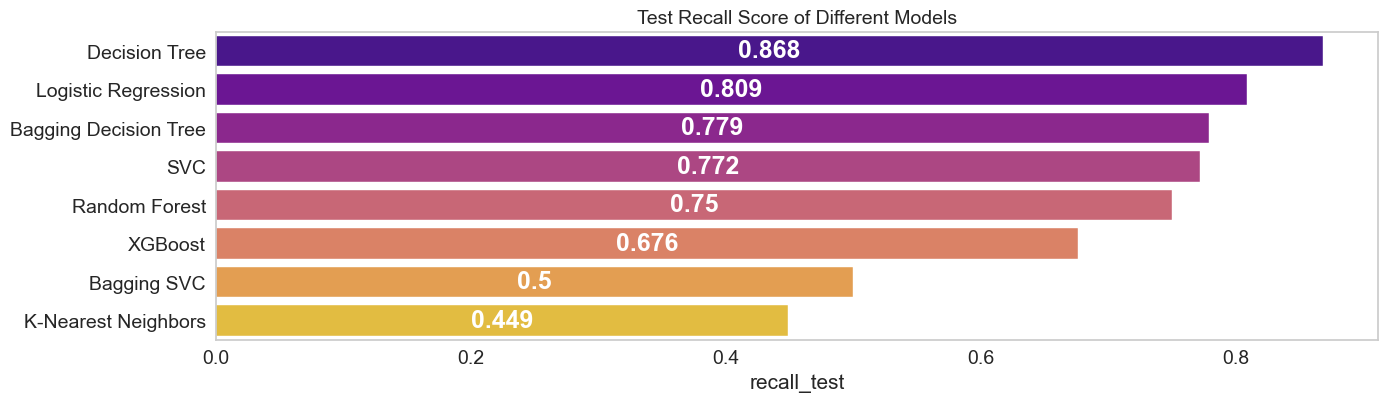

In [394]:
compare = compare.sort_values(by='recall_test', ascending=False)

plt.figure(figsize=(15,4))
ax = sns.barplot(x='recall_test', y=compare.index, data=compare.round(3), palette="plasma")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Recall Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  F1 Score Comparison

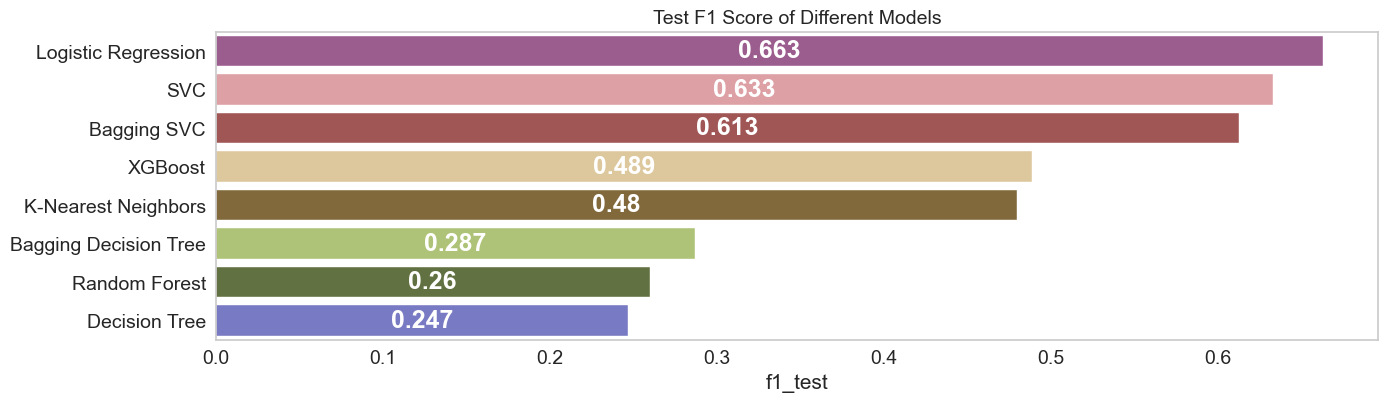

In [395]:
compare = compare.sort_values(by='f1_test', ascending=False)

plt.figure(figsize=(15,4))
ax = sns.barplot(x='f1_test', y=compare.index, data=compare.round(3), palette="tab20b_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test F1 Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  Accuracy Comparison

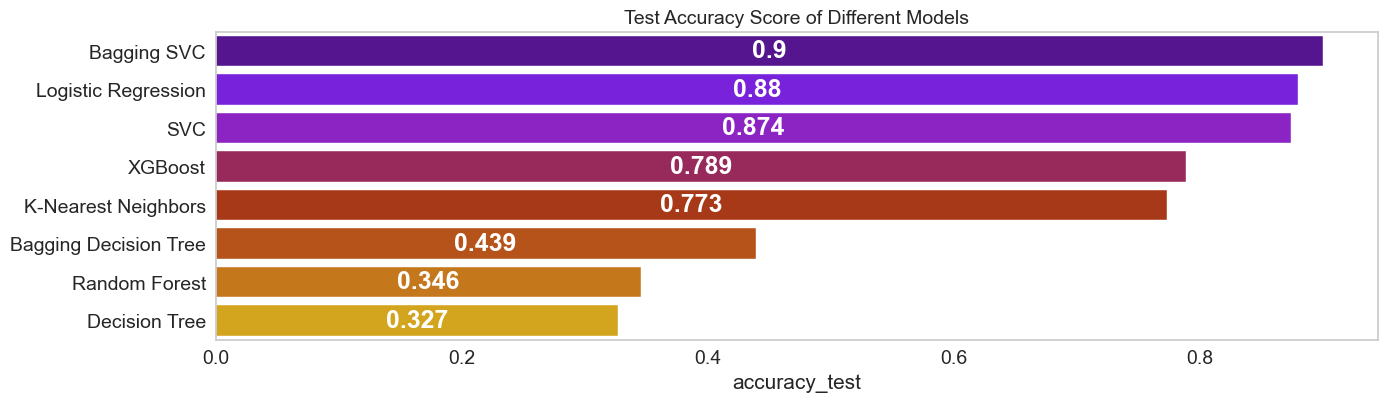

In [396]:
compare = compare.sort_values(by='accuracy_test', ascending=False)

plt.figure(figsize=(15,4))
ax = sns.barplot(x='accuracy_test', y=compare.index, data=compare.round(3), palette="gnuplot")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Accuracy Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

##  Precision Score Comparison

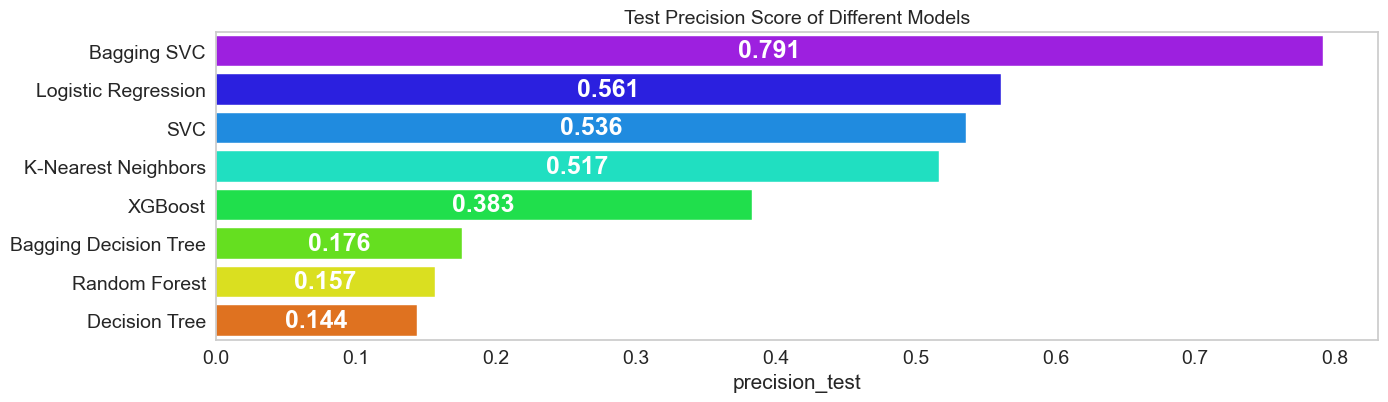

In [397]:
compare = compare.sort_values(by='precision_test', ascending=False)

plt.figure(figsize=(15,4))
ax = sns.barplot(x='precision_test', y=compare.index, data=compare.round(3), palette="gist_rainbow_r")
ax.bar_label(ax.containers[0], fontsize=18, color='w', weight='bold', label_type='center', rotation=0)

plt.title("Test Precision Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement (Synthetic Minority Oversampling Technique)

In [473]:
# !pip install imblearn
import imblearn 
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

0.9.1


In [474]:
df = pd.read_csv("ansurII_2.csv")
df.shape

X = df.drop(columns=['DODRace'])
y = df['DODRace']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [475]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)

In [476]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

pd.DataFrame(y_test).value_counts().sort_index()

0    758
1    260
2    136
dtype: int64

### SMOTE

In [477]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=random_state) 

# pipeline for SMOTE
pipe_smote = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
])
X_over, y_over = pipe_smote.fit_resample(X_train, y_train)

In [478]:
X_over.shape

(9102, 222)

In [479]:
pd.DataFrame(y_over).value_counts()

0    3034
1    3034
2    3034
dtype: int64

### RandomUnderSampler

In [480]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state=random_state) 

# pipeline for RandomUnderSampler
pipe_under = Pipeline([
    ("OneHotEncoder",column_trans),
    ("under", under),
])
X_under, y_under = pipe_under.fit_resample(X_train, y_train)

In [481]:
X_under.shape

(1629, 222)

In [482]:
pd.DataFrame(y_under).value_counts()

0    543
1    543
2    543
dtype: int64

### HybridSampler

In [483]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

smote = SMOTE(sampling_strategy={2: 1000}, random_state=random_state) 
under = RandomUnderSampler(sampling_strategy={0: 2500}, random_state=random_state) 

# pipeline for HybridSampler
# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipe_resampled = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
])
X_resampled, y_resampled = pipe_resampled.fit_resample(X_train, y_train)

In [484]:
pd.DataFrame(y_resampled).value_counts()

0    2500
1    1038
2    1000
dtype: int64

In [485]:
pd.DataFrame(y_train).value_counts()

0    3034
1    1038
2     543
dtype: int64

## Logistic Regression Over/Under Sampling

What does the smote pipeline do?

smote_pipeline.fit(X_train, y_train) 

--> column_trans.fit_transform(X_train) #(Onehooencoder and minmaxscaler)

--> over.fit_resample(X_train_transform) 
                                     
--> under.fit_resample(X_train_transform_over)

--> log_model.fit(X_train_transform_over_under, y_train)


for predict, over and under sumpling algortims do nothing for X_test.

smote_pipeline.predict(X_test)

--> column_trans.transform(X_test) #(Onehooencoder and minmaxscaler) 

--> log_model.predict(X_test_transform)

In [486]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

smote = SMOTE(sampling_strategy={2: 1000}, random_state=random_state) 
under = RandomUnderSampler(sampling_strategy={0: 2500}, random_state=random_state) 
log_model = LogisticRegression(random_state=random_state)

# pipeline for HybridSampler
# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipe_log_smote = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
    ("log", log_model),
])
pipe_log_smote.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy={2: 1000})),
                ('under',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy={0: 2500})),
                ('log', LogisticRegression(random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       758
           1       0.95      0.91      0.93       260
           2       0.68      0.67      0.68       136

    accuracy                           0.90      1154
   macro avg       0.85      0.84      0.85      1154
weighted avg       0.90      0.90      0.90      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3034
           1       0.95      0.92      0.93      1038
           2       0.69      0.70      0.70       543

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.86      4615
weighted avg       0.91      0.91      0.91      4615



accuracy_test  f1_test  recall_test  precision_test  \
Smote Logistic         0.9038   0.6766       0.6691          0.6842   

                accuracy_train  f1_train  recall_train  precision_train  
Smote Logistic          0.9096    0.6978        0.7017           0.6940

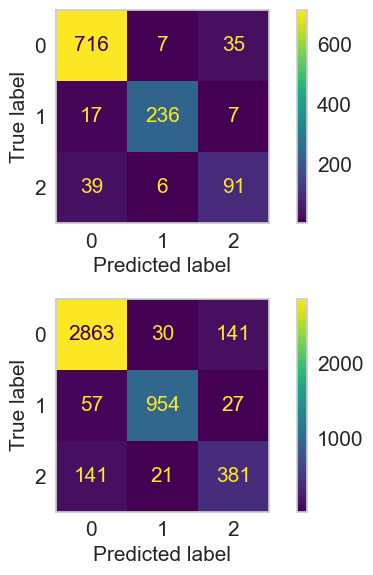

In [487]:
eval_metric(
    pipe_log_smote, X_train, y_train, X_test, y_test, 
    'Smote Logistic', average=None, labels=[2]
)

In [488]:
from sklearn.model_selection import cross_validate, cross_val_score

smote = SMOTE(sampling_strategy={2:2400}, random_state=random_state) 
under = RandomUnderSampler(sampling_strategy={0:2400}, random_state=random_state) 
log_model = LogisticRegression(random_state=random_state)

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("smote", smote),
    ("under", under),
    ("log", log_model),
])
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.6093
test_recall_2      0.7736
test_precision_2   0.5034
dtype: float64

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [489]:
# from sklearn.metrics import matthews_corrcoef

# matthews_corrcoef(y_test, y_pred)

In [490]:
# from sklearn.metrics import cohen_kappa_score

# cohen_kappa_score(y_test, y_pred)

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

## Before Check Model

{'log__C': 4.5,
 'log__class_weight': 'balanced',
 'log__penalty': 'l1',
 'log__solver': 'saga'}

In [491]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)
log_model = LogisticRegression(
    penalty='l1',  solver='saga', 
    C=4.5, class_weight='balanced',
    random_state=random_state
)
# pipeline for XGBClassifier Classifier
pipe_log = Pipeline([
    ("OneHotEncoder", column_trans), 
    ("log", log_model)
])
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['Gender',
                                                   'SubjectsBirthLocation',
                                                   'WritingPreference'])])),
                ('log',
                 LogisticRegression(C=4.5, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.88      0.91       758
           1       0.92      0.92      0.92       260
           2       0.56      0.81      0.66       136

    accuracy                           0.88      1154
   macro avg       0.81      0.87      0.83      1154
weighted avg       0.90      0.88      0.89      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3034
           1       0.93      0.95      0.94      1038
           2       0.55      0.85      0.67       543

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



accuracy_test  f1_test  recall_test  precision_test  accuracy_train  \
Logistic         0.8795   0.6627       0.8088          0.5612          0.8810   

          f1_train  recall_train  precision_train  
Logistic    0.6676        0.8545           0.5478

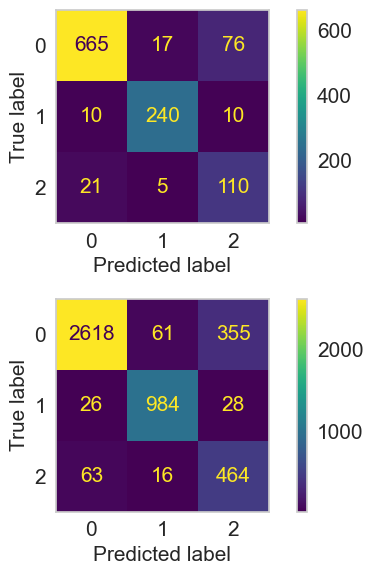

In [492]:
eval_metric(
    pipe_log, X_train, y_train, X_test, y_test, 
    'Logistic', average=None, labels=[2]
)

In [493]:
from sklearn.model_selection import cross_validate, cross_val_score

log_model = LogisticRegression(
    penalty='l1',  solver='saga', 
    C=4.5, class_weight='balanced',
    random_state=random_state
)
# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
]) 
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train, y_train, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=10,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.5982
test_recall_2      0.7713
test_precision_2   0.4900
dtype: float64

## Shap values for all data

In [494]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

cat = X_train.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)
X_train_trans = column_trans.fit_transform(X_train)
X_test_trans = column_trans.transform(X_test)
features = column_trans.get_feature_names_out(X_train.columns)
features

# ['newton-cg', "lbfgs", "liblinear", "sag", "saga"]
log_model = LogisticRegression(
    penalty='l1',  solver='saga', 
    C=4.5, class_weight='balanced',
    random_state=random_state
)
log_model.fit(X_train_trans, y_train)

LogisticRegression(C=4.5, class_weight='balanced', penalty='l1',
                   random_state=42, solver='saga')

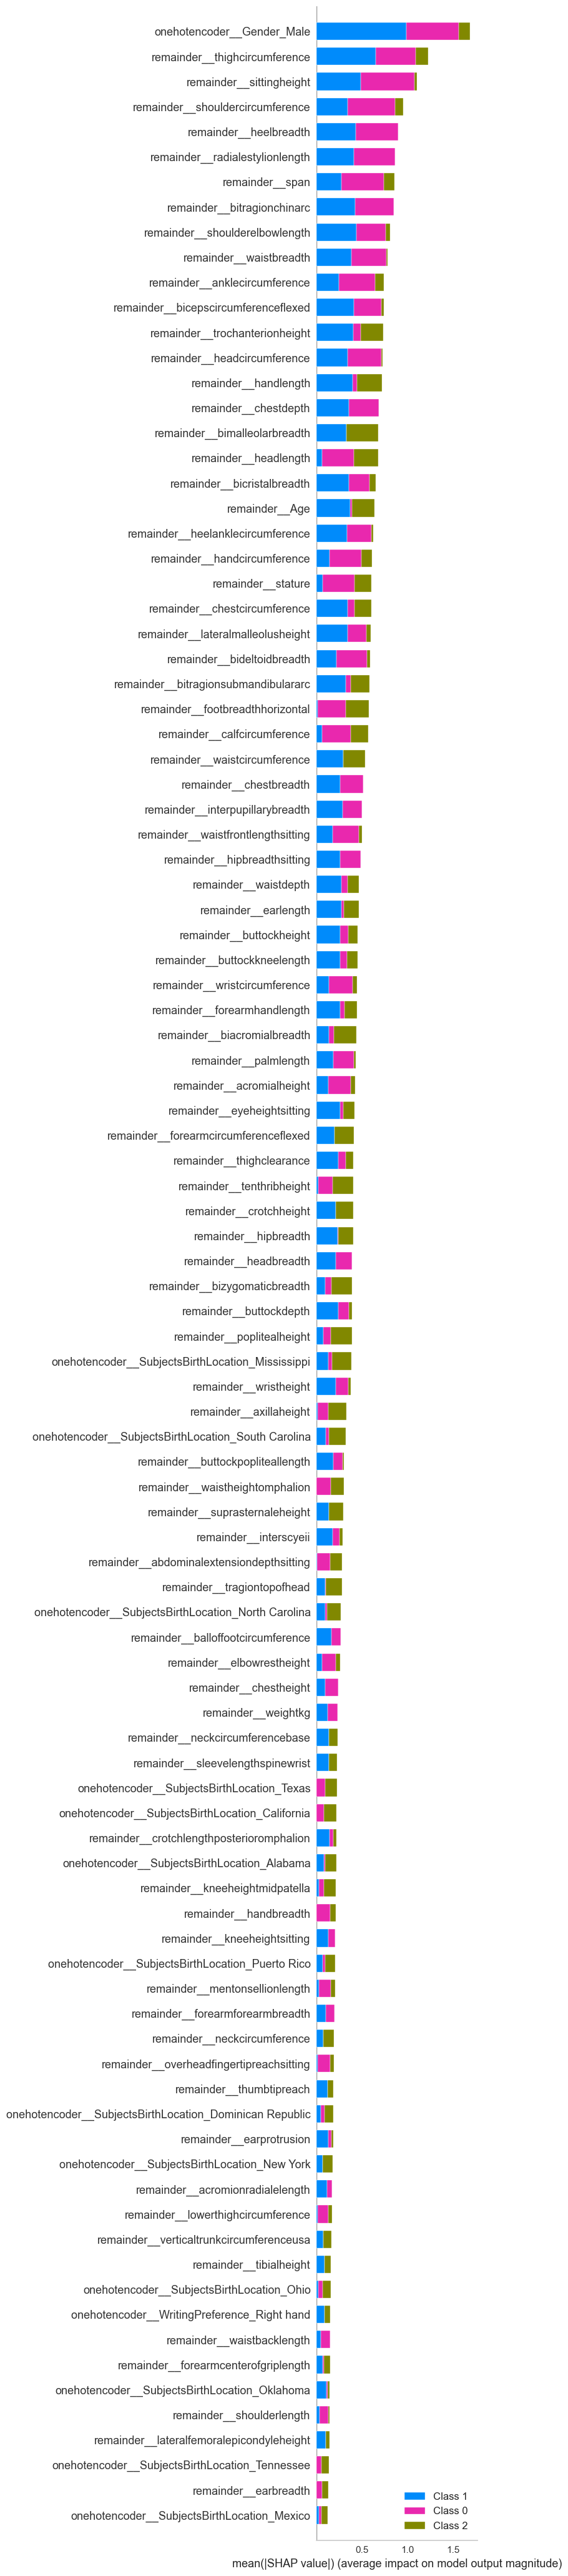

In [495]:
import shap
#LinearExplainer
explainer = shap.LinearExplainer(log_model, X_train_trans) 
shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(
    shap_values, X_test_trans, 
    feature_names = features,
    max_display=100,
)

In [496]:
np.array(shap_values).shape

(3, 1154, 222)

In [497]:
pd.DataFrame.from_records(shap_values).T

0  \
0     [-1.2832801524991928e-05, 0.45972995197522354,...   
1     [-1.2832801524991928e-05, 0.45972995197522354,...   
2     [-1.2832801524991928e-05, 0.45972995197522354,...   
3     [-1.2832801524991928e-05, 0.45972995197522354,...   
4     [-1.2832801524991928e-05, 0.45972995197522354,...   
...                                                 ...   
1149  [-1.2832801524991928e-05, 0.45972995197522354,...   
1150  [-1.2832801524991928e-05, 0.45972995197522354,...   
1151  [2.281386937776343e-05, -0.8172976924003974, -...   
1152  [2.281386937776343e-05, -0.8172976924003974, -...   
1153  [2.281386937776343e-05, -0.8172976924003974, -...   

                                                      1  \
0     [-0.04399972520671404, -0.790734069621618, 1.5...   
1     [-0.04399972520671404, -0.790734069621618, -0....   
2     [-0.04399972520671404, -0.790734069621618, -0....   
3     [-0.04399972520671404, -0.790734069621618, -0....   
4     [-0.04399972520671404, -0.790734069621618, -0....   
...                                                 ...   
1149  [-0.04399972520671404, -0.790734069621618, -0....   
1150  [-0.04399972520671404, -0.790734069621618, -0....   
1151  [0.07822173370082496, 1.4057494571050986, -0.0...   
1152  [0.07822173370082496, 1.4057494571050986, -0.0...   
1153  [0.07822173370082496, 1.4057494571050986, -0.0...   

                                                      2  
0     [6.396079135920733e-05, 0.09638654008794362, -...  
1     [6.396079135920733e-05, 0.09638654008794362, 0...  
2     [6.396079135920733e-05, 0.09638654008794362, 0...  
3     [6.396079135920733e-05, 0.09638654008794362, 0...  
4     [6.396079135920733e-05, 0.09638654008794362, 0...  
...                                                 ...  
1149  [6.396079135920733e-05, 0.09638654008794362, 0...  
1150  [6.396079135920733e-05, 0.09638654008794362, 0...  
1151  [-0.00011370807352747972, -0.1713538490452331,...  
1152  [-0.00011370807352747972, -0.1713538490452331,...  
1153  [-0.00011370807352747972, -0.1713538490452331,...  

[1154 rows x 3 columns]

In [498]:
# check class index 2 
shap_values[2].shape

(1154, 222)

## Shap values check local data

In [499]:
pd.DataFrame(X_test_trans).head()

0      1      2      3      4      5      6      7      8      9    \
0 0.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     10     11     12     13     14     15     16     17     18     19   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     20     21     22     23     24     25     26     27     28     29   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     30     31     32     33     34     35     36     37     38     39   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     40     41     42     43     44     45     46     47     48     49   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     50     51     52     53     54     55     56     57     58     59   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     60     61     62     63     64     65     66     67     68     69   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000   
4 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000   

     70     71     72     73     74     75     76     77     78     79   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     80     81     82     83     84     85     86     87     88     89   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
2 0.0000 0.0000 0.0000 0.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
3 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4 0.0000 0.0000 0.0000

In [500]:
pd.DataFrame(X_test_trans[:1])

0      1      2      3      4      5      6      7      8      9    \
0 0.0000 1.0000 1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     10     11     12     13     14     15     16     17     18     19   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     20     21     22     23     24     25     26     27     28     29   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     30     31     32     33     34     35     36     37     38     39   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     40     41     42     43     44     45     46     47     48     49   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     50     51     52     53     54     55     56     57     58     59   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     60     61     62     63     64     65     66     67     68     69   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     70     71     72     73     74     75     76     77     78     79   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     80     81     82     83     84     85     86     87     88     89   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     90     91     92     93     94     95     96     97     98     99   \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     100    101    102    103    104    105    106    107    108    109  \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     110    111    112    113    114    115    116    117    118    119  \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

     120    121    122    123    124    125    126    127    128    129  \
0 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 1.0000 0.4458 0.5903   

     130    131    132    133    134    135    136    137    138    139  \
0 0.6736 0.6742 0.5743 0.5417 0.6064 0.6866 0.4416 0.6242 0.4786 0.6111   

     140    141    142    143    144    145    146    147    148    149  \
0 0.5315 0.5221 0.5600 0.5165 0.2384 0.6132 0.6375 0.6444 0.4708 0.6415   

     150    151    152    153    154    155    156    157    158    159  \
0 0.5133 0.4993 0.3770 0.6443 0.6485 0.3528 0.4578 0.5238 0.4857 0.5238   

     160    161    162    163    164    165    166    167    168    169  \
0 0.4975 0.6532 0.5918 0.5000 0.5570 0.5743 0.4499 0.5905 0.7963 0.5526   

     170    171    172    173    174    175    176    177    178    179  \
0 0.5682 0.5176 0.6444 0.7068 0.6607 0.6552 0.6000 0.4757 0.4330 0.5812   

     180    181    182    183    184    185    186    187    188    189  \
0 0.5686 0.5479 0.5867 0.5827 0.6409 0.6198 0.7917 0.5480 0.4677 0.4854   

     190    191    192    193    194    195    196    197    198    199  \
0 0.5684 0.6796 0.4583 0.6091 0.6101 0.5668 0.7237 0.6234 0.6679 0.6830   

     200    201    202    203    204    205    206    207    208    209  \
0 0.6254 0.6802 0.6316 0.6280 0.5940 0.5066 0.4576 0.6465 0.5696 0.7727   

     210    211    212    213    214    215    216    217    218    219  \
0 0.6326 0.3652 0.5523 0.4720 0.4578 0.4051 0.5073 0.6224 0.4696 0.6087   

     220    221  
0 0.5794 0.0488

In [501]:
# y_test and predict
y_test[:1], log_model.predict(X_test_trans[:1])

(array([0], dtype=int64), array([0], dtype=int64))

In [502]:
shap.initjs()
# Visualize local predictions
# Expected result (up to a rounding error)
prediction = log_model.predict(X_test_trans[:1])
shap_values_loc = explainer.shap_values(X_test_trans[:1])
print(f"Model predicted class: {prediction}")
print(f"Model predicted shape: {shap_values_loc[0].shape}")

for clas in range(0,3):    
    # Force plot
    display(
        shap.force_plot(
            explainer.expected_value[clas],
            shap_values_loc[clas],
            X_test_trans[:1], # for values
            feature_names= features,
        )
    )

Model predicted class: [0]
Model predicted shape: (1, 222)


## Shap values visualize all Features

In [503]:
display(
    X_test.head(1),
    pd.DataFrame(y_test).head(1))

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
4013                             266            1463                    346   

      anklecircumference  axillaheight  balloffootcircumference  \
4013                 245          1344                      251   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
4013               208                421                        337   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
4013               300               491                  77   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
4013               326                        316                 144   

      buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
4013                  1035           212            916                639   

      buttockpopliteallength  calfcircumference  cervicaleheight  \
4013                     525                387             1548   

      chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  \
4013           290                1034         239         1326           883   

      crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  \
4013                    588                             346          36   

      earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
4013         63             24              236               820   

      footbreadthhorizontal  footlength  forearmcenterofgriplength  \
4013                    106         264                        346   

      forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  \
4013                         316                    542                479   

      functionalleglength  handbreadth  handcircumference  handlength  \
4013                 1218           88                210         194   

      headbreadth  headcircumference  headlength  heelanklecircumference  \
4013          161                596         206                     353   

      heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
4013           75         362                393                1070   

      interpupillarybreadth  interscyei  interscyeii  kneeheightmidpatella  \
4013                    655         430          465                   501   

      kneeheightsitting  lateralfemoralepicondyleheight  \
4013                573                             502   

      lateralmalleolusheight  lowerthighcircumference  mentonsellionlength  \
4013                      81                      427                  123   

      neckcircumference  neckcircumferencebase  overheadfingertipreachsitting  \
4013                391                    444                           1478   

      palmlength  poplitealheight  radialestylionlength  \
4013         114              439                   266   

      shouldercircumference  shoulderelbowlength  shoulderlength  \
4013                   1170                  381             156   

      sittingheight  sleevelengthspinewrist  sleeveoutseam  span  stature  \
4013            941                     914            597  1859     1790   

      suprasternaleheight  tenthribheight  thighcircumference  thighclearance  \
4013                 1464            1130                 644             175   

      thumbtipreach  tibialheight  tragiontopofhead  trochanterionheight  \
4013            858           482               139                  932   

      verticaltrunkcircumferenceusa  waistbacklength  waistbreadth  \
4013                           1579              477           329   

      waistcircumference  waistdepth  waistfrontlengthsitting  \
4013                 953         240                      393   

      waistheightomphalion  weightkg  wristcircumference  wristheight Gender  \
4013                  1080       867                 180          874   Male   

     SubjectsBirthLocation  Age WritingPrefer

0
0  0

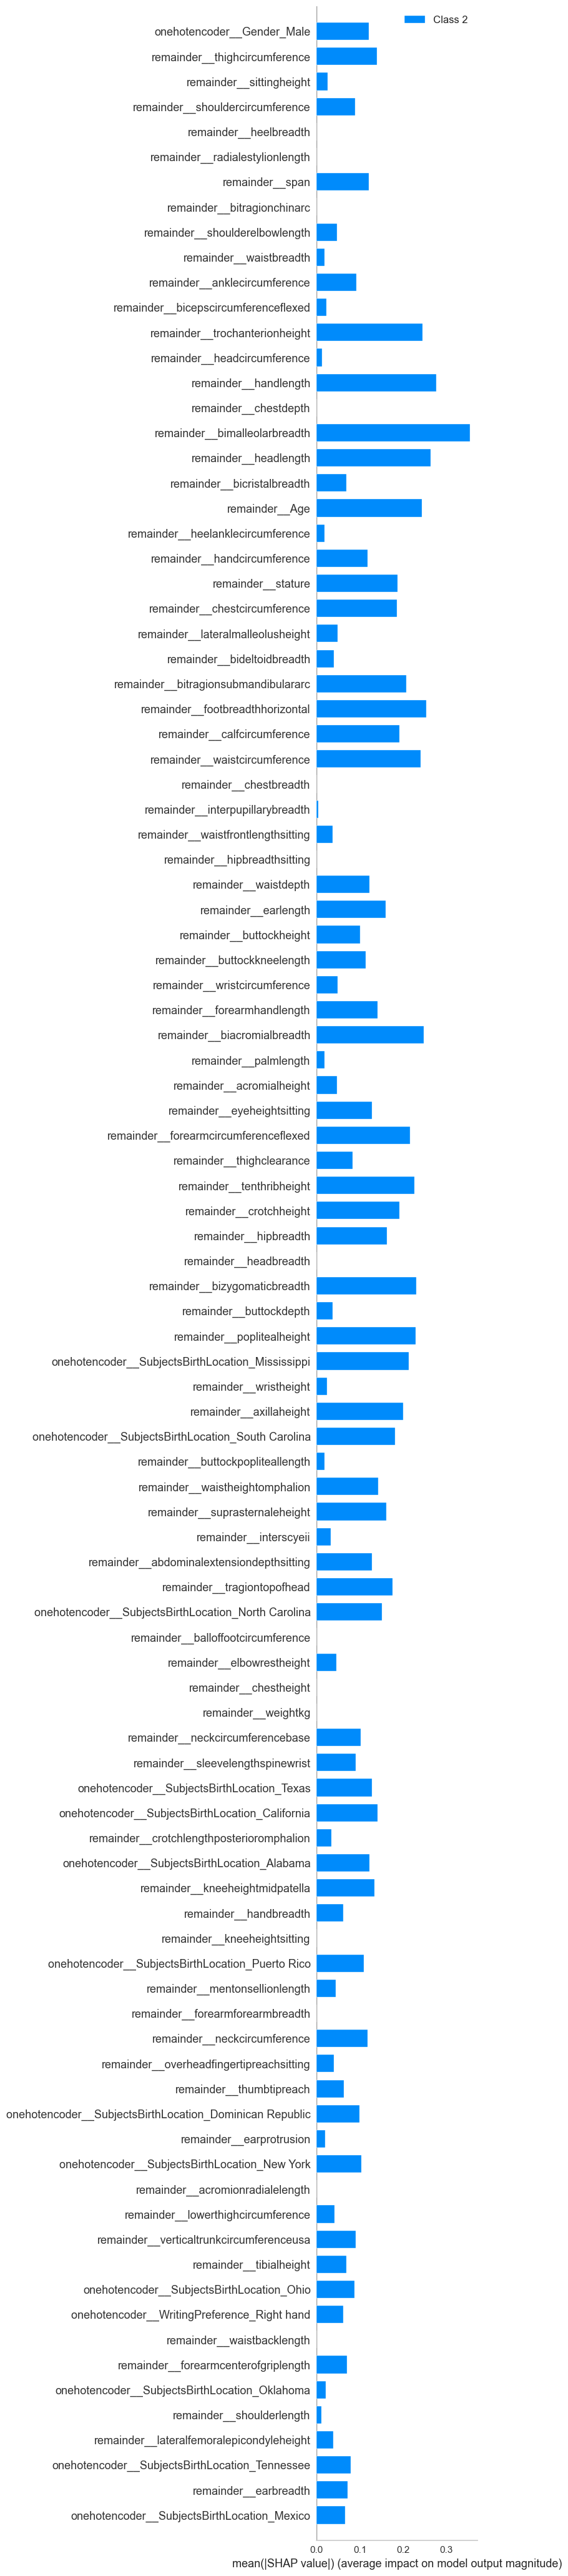

In [504]:
# visualize class index 2 
shap.summary_plot(
    shap_values, 
    X_test_trans,
    feature_names=features,
    max_display=100,
    plot_type="bar",
    class_inds=[2]
)

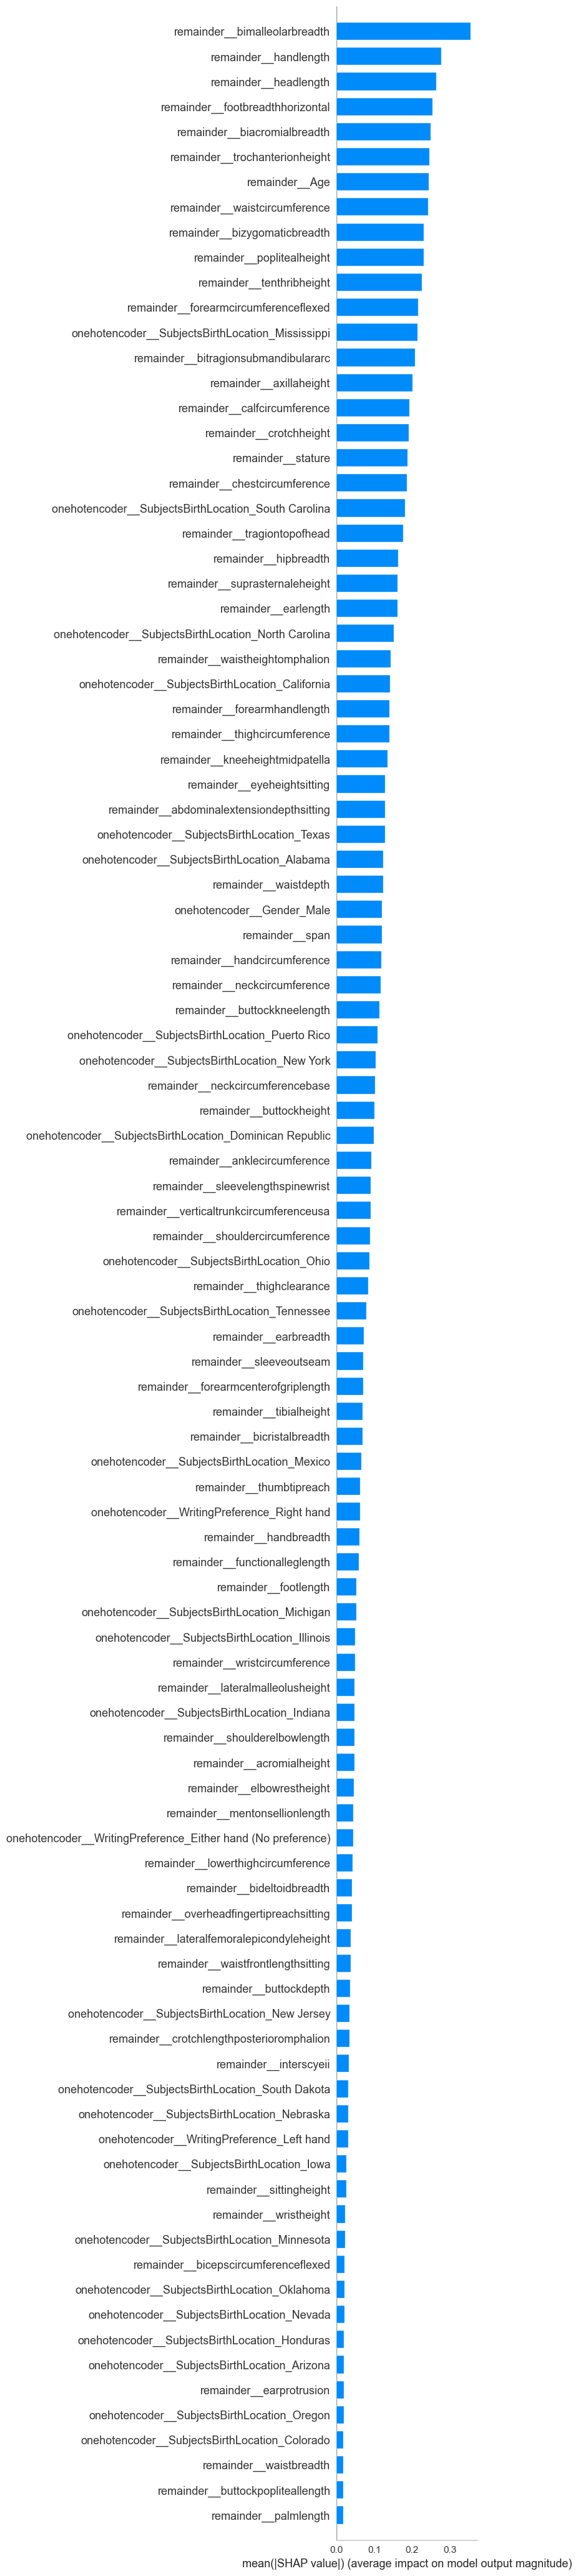

In [505]:
# visualize class index 2 
shap.summary_plot(
    shap_values[2], 
    X_test_trans,
    feature_names=features,
    max_display=100,
    plot_type="bar",
)

## Shap values Feature Importance

In [513]:
# features = column_trans.get_feature_names_out(X_train.columns)
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(features, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], key=abs, ascending=False, inplace=True)
feature_importance = feature_importance.replace(['onehotencoder__', 'remainder__'], '', regex=True)

top_N_percent = feature_importance.quantile(0.95).values[0]
display(feature_importance)
feature_importance = feature_importance[feature_importance['feature_importance_vals']> top_N_percent]['col_name']
feature_importance_list = [i for i in feature_importance.to_list() if not i.startswith(('SubjectsBirth','Gender'))]
print(f'top_N_percent upper: {top_N_percent.round(0):>30}')
print(f'feature_importance_list top_N_percent feature: {len(feature_importance_list)}\n')
print(feature_importance_list+['SubjectsBirthLocation', 'Gender'])

col_name  feature_importance_vals
1                       Gender_Male                 648.6831
205              thighcircumference                 473.0860
198                   sittingheight                 424.1781
195           shouldercircumference                 365.4966
176                     heelbreadth                 346.2018
..                              ...                      ...
43     SubjectsBirthLocation_Guyana                   0.0000
35   SubjectsBirthLocation_Ethiopia                   0.0000
33      SubjectsBirthLocation_Egypt                   0.0000
110      SubjectsBirthLocation_Togo                   0.0000
40      SubjectsBirthLocation_Ghana                   0.0000

[222 rows x 2 columns]

top_N_percent upper:                          283.0
feature_importance_list top_N_percent feature: 11

['thighcircumference', 'sittingheight', 'shouldercircumference', 'heelbreadth', 'radialestylionlength', 'span', 'bitragionchinarc', 'shoulderelbowlength', 'waistbreadth', 'anklecircumference', 'bicepscircumferenceflexed', 'SubjectsBirthLocation', 'Gender']


In [514]:
feature_importance_list+['SubjectsBirthLocation', 'Gender']

['thighcircumference',
 'sittingheight',
 'shouldercircumference',
 'heelbreadth',
 'radialestylionlength',
 'span',
 'bitragionchinarc',
 'shoulderelbowlength',
 'waistbreadth',
 'anklecircumference',
 'bicepscircumferenceflexed',
 'SubjectsBirthLocation',
 'Gender']

In [515]:
hispanic = [
    "SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
    'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
    'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
    'axillaheight', "Age"
]

## Shap values Define New Model Logistic

In [516]:
X_shap = X[feature_importance_list+['SubjectsBirthLocation', 'Gender']]
print(X_shap.shape)

X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(
    X_shap, y, test_size=0.2, stratify=y, random_state=random_state
)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_shap = le.fit_transform(y_train_shap)
y_test_shap = le.transform(y_test_shap)

(5769, 13)


In [517]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

cat = X_train_shap.select_dtypes("object").columns.to_list()
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
    remainder=MinMaxScaler()
)
log_model = LogisticRegression(penalty='l2', C=5, class_weight='balanced', solver='lbfgs', random_state=random_state)

# pipeline for Logistic Regression
pipe_log_shap = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log", log_model)
])
pipe_log_shap.fit(X_train_shap, y_train_shap)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['SubjectsBirthLocation',
                                                   'Gender'])])),
                ('log',
                 LogisticRegression(C=5, class_weight='balanced',
                                    random_state=42))])

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.83      0.89       758
           1       0.83      0.89      0.86       260
           2       0.51      0.79      0.62       136

    accuracy                           0.84      1154
   macro avg       0.76      0.84      0.79      1154
weighted avg       0.87      0.84      0.85      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      3034
           1       0.86      0.89      0.88      1038
           2       0.45      0.78      0.57       543

    accuracy                           0.82      4615
   macro avg       0.75      0.83      0.77      4615
weighted avg       0.87      0.82      0.84      4615



accuracy_test  f1_test  recall_test  precision_test  \
SHAP Logistic Regression         0.8388   0.6167       0.7868          0.5071   

                          accuracy_train  f1_train  recall_train  \
SHAP Logistic Regression          0.8249    0.5688        0.7845   

                          precision_train  
SHAP Logistic Regression           0.4461

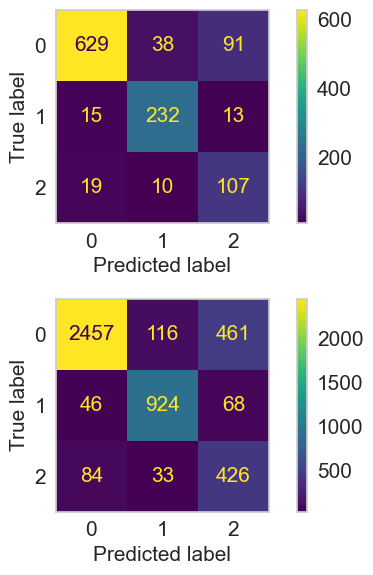

In [518]:
eval_metric(
    pipe_log_shap, X_train_shap, y_train_shap, X_test_shap, y_test_shap, 
    'SHAP Logistic Regression', average=None, labels=[2]
)

### Cross Validate Model

In [519]:
from sklearn.model_selection import cross_validate, cross_val_score

log_model = LogisticRegression(C=5, class_weight='balanced', random_state=random_state)

# pipeline for Cross Validate
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("log",log_model)
]) 
scoring = {
    "f1_2" : make_scorer(f1_score, average = None, labels=[2]),
    "recall_2" : make_scorer(recall_score, average = None, labels=[2]),
    "precision_2" : make_scorer(precision_score, average = None, labels=[2]),
}
scores = cross_validate(
    model, X_train_shap, y_train_shap, 
    scoring = scoring, # ['accuracy', 'f1_macro', 'precision_macro','recall_macro'], 
    error_score="raise",
    n_jobs=-1,
    cv=5,
)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
df_scores.mean()[2:]

test_f1_2          0.5492
test_recall_2      0.7532
test_precision_2   0.4323
dtype: float64

## Shap values Define New Model SVC

In [520]:
from sklearn.model_selection import GridSearchCV

# probability True to obtain ROC etc.
svc_model = SVC(probability=True, random_state=random_state)  

# pipeline for GridsearchCV
model = Pipeline([
    ("OneHotEncoder",column_trans),
    ("svc", svc_model)
])
param_grid = {
    'svc__C': np.linspace(1, 2, 3),
    'svc__gamma': ["scale"], # ['scale', 'auto', 0.1, 1]
    'svc__kernel': ['poly'], # ['linear', 'poly', 'rbf']
    'svc__degree': [2],
    'svc__class_weight': ['balanced'], # [None, "balanced"]
    'svc__decision_function_shape': ['ovo'], # ['ovo', 'ovr']
     
}
f1_2 = make_scorer(f1_score, average = None, labels=[2])
recall_2 = make_scorer(recall_score, average = None, labels=[2])
grid_model = GridSearchCV(
    estimator=model,
    param_grid = param_grid, 
    error_score="raise",
    scoring=recall_2,
    n_jobs=-1,
    cv=5
) 
# grid_model.estimator.get_params().keys()

In [521]:
%%time
grid_model.fit(X_train_shap, y_train_shap)

CPU times: total: 9.8 s
Wall time: 51.3 s


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['SubjectsBirthLocation',
                                                                          'Gender'])])),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': array([1. , 1.5, 2. ]),
                         'svc__class_weight': ['balanced'],
                         'svc__decision_function_shape': ['ovo'],
                         'svc__degree': [2], 'svc__gamma': ['scale'],
                         'svc__kernel': ['poly']},
             scoring=make_scorer(recall_score, average=None, labels=[2]))

In [522]:
grid_model.best_params_

{'svc__C': 1.0,
 'svc__class_weight': 'balanced',
 'svc__decision_function_shape': 'ovo',
 'svc__degree': 2,
 'svc__gamma': 'scale',
 'svc__kernel': 'poly'}

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.80      0.87       758
           1       0.85      0.87      0.86       260
           2       0.45      0.82      0.58       136

    accuracy                           0.82      1154
   macro avg       0.75      0.83      0.77      1154
weighted avg       0.87      0.82      0.83      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      3034
           1       0.87      0.87      0.87      1038
           2       0.41      0.81      0.54       543

    accuracy                           0.81      4615
   macro avg       0.74      0.82      0.76      4615
weighted avg       0.87      0.81      0.82      4615



accuracy_test  f1_test  recall_test  precision_test  \
SHAP Decision Tree         0.8189   0.5796       0.8162          0.4494   

                    accuracy_train  f1_train  recall_train  precision_train  
SHAP Decision Tree          0.8056    0.5433        0.8085           0.4091

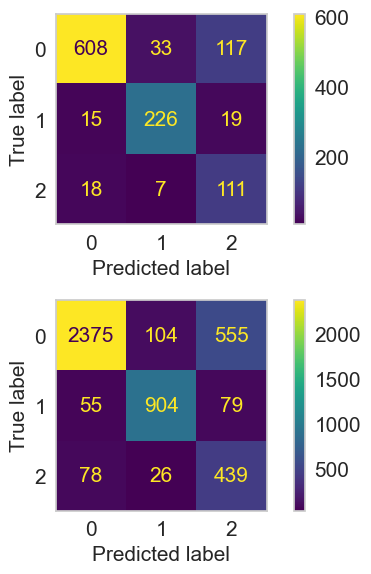

In [523]:
out_score_dt_shap = eval_metric(
    grid_model, X_train_shap, y_train_shap, X_test_shap, y_test_shap, 
    'SHAP Decision Tree', average=None, labels=[2]
)
out_score_dt_shap

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

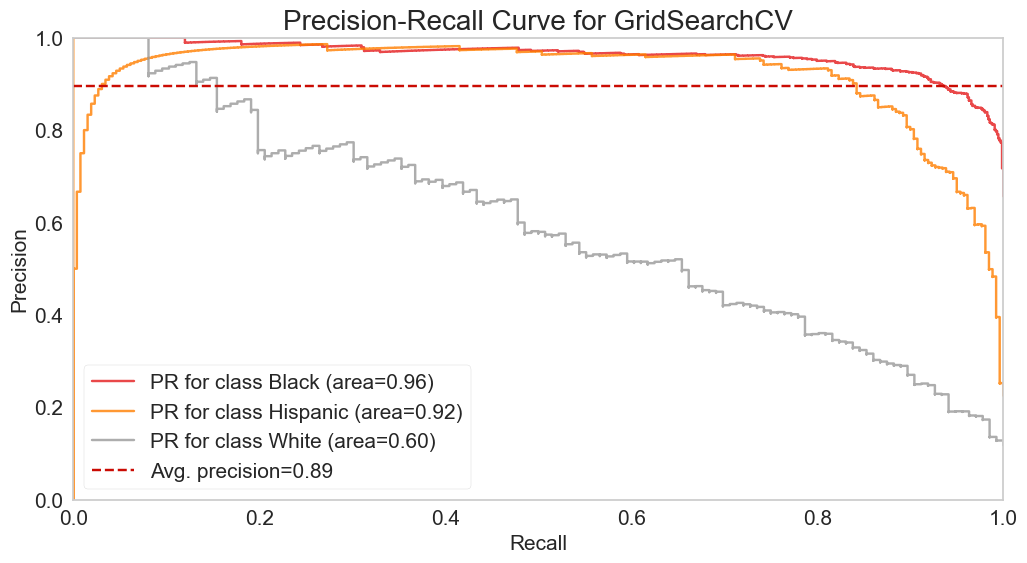

In [524]:
from yellowbrick.classifier import PrecisionRecallCurve
model = grid_model

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train_shap, y_train_shap)
viz.score(X_test_shap, y_test_shap)
viz.show();

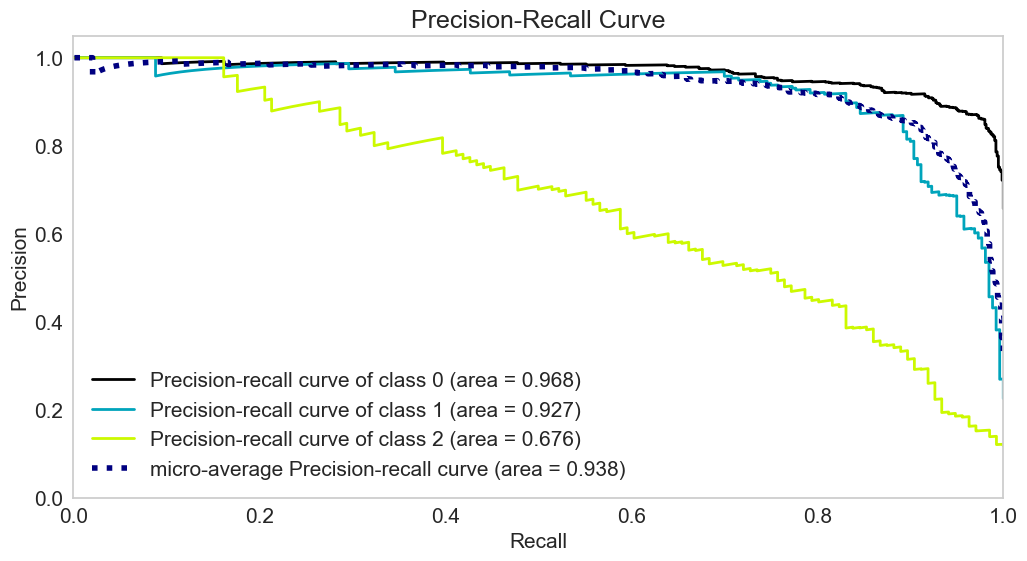

In [525]:
# !pip install scikit-plot
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall

model = grid_model
model.fit(X_train_shap, y_train_shap)
y_pred_proba = model.predict_proba(X_test_shap)
plot_precision_recall(y_test_shap, y_pred_proba)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___